# Lab 4:  Regularization

## Sunday, November 3rd 2019

#### David Sondak and Pavlos Protopapas

# Background
Lecture 4 introduced several types of regularization.  In today's lab, you will become more familiar with those regularization techniques and actually apply them to a problem.  The types of regularization that you will explore today are:
* Penalization
* Early stopping
* Dropout

There are many other types of regularization (as mentioned in lecture).  The three regularization techniques that you will explore today are very popular and used frequently in real applications.

We'll begin the story by building a neural network to learn a function from some noisy data.

# Warming Up
Today we'll try to fit the function $$f\left(x\right) = x\sin\left(x\right).$$

Using `keras`, build a fully-connected neural network to fit $f\left(x\right)$.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import models
from keras import layers
%matplotlib inline

Using TensorFlow backend.


First, we'll generate some synthetic data with some synthetic noise.

In [2]:
n_samples = 100 # set the number of samples to take for each toy dataset
test_size = 0.2 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: x * np.sin(x)

# Generate the truth function (without any noise)
X_true = np.linspace(0.0, 5.0, n_samples)
Y_true = f(X_true)

# Now sample the true function at some points
X = np.random.permutation(X_true) # choose some points from the function - this is our toy dataset 
Y = f(X)

Y = Y + np.random.normal(0.0, 1.0, len(Y)) # Add some noise from a random normal distribution

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Quickly, let's have a look at our training data.

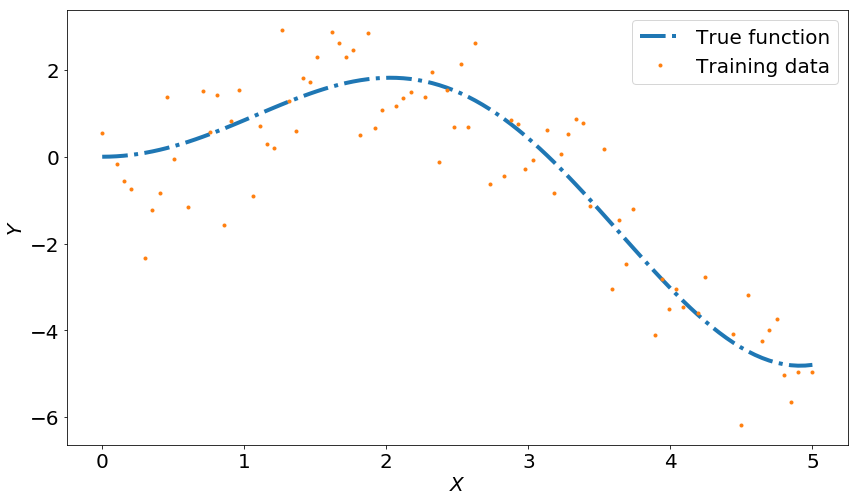

In [3]:
# Plot training data
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.plot(X_true, Y_true, ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

Now we'll build a network.  We choose $5$ hidden layers and $100$ nodes per layer.

In [4]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for _ in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

In [5]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

Next we'll fit the model.  

Notice that we're specifying a *validation set*.  What this means is that `keras` will further split the training set into a training part and a validation part.  The neural network will only be trained on the *training* set.  Meanwhile, `keras` will report performance metrics on the *validation* set so we can get a sense of how well the model has been trained.  We will be using the validation set quite a bit in this lab.

Remember, we don't want to use the test set for anything relating to the training of our models.  By withholding the validation set, we can assess the model performance on the validation set.  Later, we can see how the model performs on data it has never seen before by using in on the test set.

In [6]:
# Fit the model
no_reg = model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 0s 7ms/step - loss: 5.3037 - val_loss: 3.8521
Epoch 2/2500
64/64 [==============================] - 0s 52us/step - loss: 5.0197 - val_loss: 3.5972
Epoch 3/2500
64/64 [==============================] - 0s 85us/step - loss: 4.7764 - val_loss: 3.3784
Epoch 4/2500
64/64 [==============================] - 0s 75us/step - loss: 4.5776 - val_loss: 3.2095
Epoch 5/2500
64/64 [==============================] - 0s 62us/step - loss: 4.4375 - val_loss: 3.1326
Epoch 6/2500
64/64 [==============================] - 0s 75us/step - loss: 4.4010 - val_loss: 3.1407
Epoch 7/2500
64/64 [==============================] - 0s 63us/step - loss: 4.4489 - val_loss: 3.1471
Epoch 8/2500
64/64 [==============================] - 0s 77us/step - loss: 4.4739 - val_loss: 3.1066
Epoch 9/2500
64/64 [==============================] - 0s 74us/step - loss: 4.4279 - val_loss: 3.0496
Epoch 10/2500
64/64 [===========================

Epoch 81/2500
64/64 [==============================] - 0s 85us/step - loss: 0.8336 - val_loss: 1.3744
Epoch 82/2500
64/64 [==============================] - 0s 83us/step - loss: 0.8333 - val_loss: 1.2520
Epoch 83/2500
64/64 [==============================] - 0s 103us/step - loss: 0.8212 - val_loss: 1.1802
Epoch 84/2500
64/64 [==============================] - 0s 81us/step - loss: 0.8255 - val_loss: 1.2789
Epoch 85/2500
64/64 [==============================] - 0s 76us/step - loss: 0.8251 - val_loss: 1.1896
Epoch 86/2500
64/64 [==============================] - 0s 77us/step - loss: 0.8174 - val_loss: 1.1301
Epoch 87/2500
64/64 [==============================] - 0s 92us/step - loss: 0.8205 - val_loss: 1.2220
Epoch 88/2500
64/64 [==============================] - 0s 46us/step - loss: 0.8186 - val_loss: 1.1579
Epoch 89/2500
64/64 [==============================] - 0s 78us/step - loss: 0.8116 - val_loss: 1.1248
Epoch 90/2500
64/64 [==============================] - 0s 78us/step - loss: 0.812

Epoch 161/2500
64/64 [==============================] - 0s 67us/step - loss: 0.7515 - val_loss: 1.1618
Epoch 162/2500
64/64 [==============================] - 0s 61us/step - loss: 0.7493 - val_loss: 1.1821
Epoch 163/2500
64/64 [==============================] - 0s 61us/step - loss: 0.7480 - val_loss: 1.2093
Epoch 164/2500
64/64 [==============================] - 0s 60us/step - loss: 0.7485 - val_loss: 1.1492
Epoch 165/2500
64/64 [==============================] - 0s 54us/step - loss: 0.7492 - val_loss: 1.2176
Epoch 166/2500
64/64 [==============================] - 0s 53us/step - loss: 0.7499 - val_loss: 1.1337
Epoch 167/2500
64/64 [==============================] - 0s 64us/step - loss: 0.7493 - val_loss: 1.2238
Epoch 168/2500
64/64 [==============================] - 0s 53us/step - loss: 0.7488 - val_loss: 1.1476
Epoch 169/2500
64/64 [==============================] - 0s 53us/step - loss: 0.7476 - val_loss: 1.2161
Epoch 170/2500
64/64 [==============================] - 0s 55us/step - lo

Epoch 241/2500
64/64 [==============================] - 0s 60us/step - loss: 0.7172 - val_loss: 1.0709
Epoch 242/2500
64/64 [==============================] - 0s 81us/step - loss: 0.7061 - val_loss: 1.1109
Epoch 243/2500
64/64 [==============================] - 0s 61us/step - loss: 0.7011 - val_loss: 1.1513
Epoch 244/2500
64/64 [==============================] - 0s 54us/step - loss: 0.7037 - val_loss: 1.0368
Epoch 245/2500
64/64 [==============================] - 0s 67us/step - loss: 0.7095 - val_loss: 1.2217
Epoch 246/2500
64/64 [==============================] - 0s 68us/step - loss: 0.7143 - val_loss: 1.0242
Epoch 247/2500
64/64 [==============================] - 0s 58us/step - loss: 0.7107 - val_loss: 1.1703
Epoch 248/2500
64/64 [==============================] - 0s 87us/step - loss: 0.7037 - val_loss: 1.0822
Epoch 249/2500
64/64 [==============================] - 0s 75us/step - loss: 0.6978 - val_loss: 1.0704
Epoch 250/2500
64/64 [==============================] - 0s 72us/step - lo

Epoch 321/2500
64/64 [==============================] - 0s 71us/step - loss: 0.6851 - val_loss: 1.1375
Epoch 322/2500
64/64 [==============================] - 0s 66us/step - loss: 0.6936 - val_loss: 0.8921
Epoch 323/2500
64/64 [==============================] - 0s 67us/step - loss: 0.6758 - val_loss: 0.9868
Epoch 324/2500
64/64 [==============================] - 0s 63us/step - loss: 0.6674 - val_loss: 1.0507
Epoch 325/2500
64/64 [==============================] - 0s 65us/step - loss: 0.6716 - val_loss: 0.8824
Epoch 326/2500
64/64 [==============================] - 0s 53us/step - loss: 0.6785 - val_loss: 1.0827
Epoch 327/2500
64/64 [==============================] - 0s 53us/step - loss: 0.6782 - val_loss: 0.9394
Epoch 328/2500
64/64 [==============================] - 0s 62us/step - loss: 0.6683 - val_loss: 0.9618
Epoch 329/2500
64/64 [==============================] - 0s 69us/step - loss: 0.6647 - val_loss: 1.0349
Epoch 330/2500
64/64 [==============================] - 0s 55us/step - lo

Epoch 401/2500
64/64 [==============================] - 0s 75us/step - loss: 0.6549 - val_loss: 0.8910
Epoch 402/2500
64/64 [==============================] - 0s 91us/step - loss: 0.6440 - val_loss: 0.9539
Epoch 403/2500
64/64 [==============================] - 0s 74us/step - loss: 0.6383 - val_loss: 1.0001
Epoch 404/2500
64/64 [==============================] - 0s 76us/step - loss: 0.6367 - val_loss: 0.8850
Epoch 405/2500
64/64 [==============================] - 0s 75us/step - loss: 0.6413 - val_loss: 1.0669
Epoch 406/2500
64/64 [==============================] - 0s 60us/step - loss: 0.6481 - val_loss: 0.9056
Epoch 407/2500
64/64 [==============================] - 0s 63us/step - loss: 0.6353 - val_loss: 0.9532
Epoch 408/2500
64/64 [==============================] - 0s 57us/step - loss: 0.6305 - val_loss: 0.9735
Epoch 409/2500
64/64 [==============================] - 0s 72us/step - loss: 0.6318 - val_loss: 0.9176
Epoch 410/2500
64/64 [==============================] - 0s 83us/step - lo

Epoch 481/2500
64/64 [==============================] - 0s 62us/step - loss: 0.6037 - val_loss: 0.8931
Epoch 482/2500
64/64 [==============================] - 0s 56us/step - loss: 0.5896 - val_loss: 0.8966
Epoch 483/2500
64/64 [==============================] - 0s 69us/step - loss: 0.5942 - val_loss: 1.0000
Epoch 484/2500
64/64 [==============================] - 0s 55us/step - loss: 0.5964 - val_loss: 0.9286
Epoch 485/2500
64/64 [==============================] - 0s 70us/step - loss: 0.5889 - val_loss: 0.9340
Epoch 486/2500
64/64 [==============================] - 0s 89us/step - loss: 0.5850 - val_loss: 0.9460
Epoch 487/2500
64/64 [==============================] - 0s 83us/step - loss: 0.5855 - val_loss: 0.8828
Epoch 488/2500
64/64 [==============================] - 0s 61us/step - loss: 0.5849 - val_loss: 0.9919
Epoch 489/2500
64/64 [==============================] - 0s 61us/step - loss: 0.5863 - val_loss: 0.8662
Epoch 490/2500
64/64 [==============================] - 0s 83us/step - lo

Epoch 561/2500
64/64 [==============================] - 0s 68us/step - loss: 0.5501 - val_loss: 0.8975
Epoch 562/2500
64/64 [==============================] - 0s 58us/step - loss: 0.5383 - val_loss: 0.8927
Epoch 563/2500
64/64 [==============================] - 0s 71us/step - loss: 0.5334 - val_loss: 0.9778
Epoch 564/2500
64/64 [==============================] - 0s 62us/step - loss: 0.5356 - val_loss: 0.8252
Epoch 565/2500
64/64 [==============================] - 0s 61us/step - loss: 0.5427 - val_loss: 1.0211
Epoch 566/2500
64/64 [==============================] - 0s 54us/step - loss: 0.5412 - val_loss: 0.8101
Epoch 567/2500
64/64 [==============================] - 0s 98us/step - loss: 0.5414 - val_loss: 1.0295
Epoch 568/2500
64/64 [==============================] - 0s 72us/step - loss: 0.5370 - val_loss: 0.8399
Epoch 569/2500
64/64 [==============================] - 0s 63us/step - loss: 0.5376 - val_loss: 1.0474
Epoch 570/2500
64/64 [==============================] - 0s 83us/step - lo

Epoch 641/2500
64/64 [==============================] - 0s 64us/step - loss: 0.5013 - val_loss: 1.0655
Epoch 642/2500
64/64 [==============================] - 0s 73us/step - loss: 0.4997 - val_loss: 0.8585
Epoch 643/2500
64/64 [==============================] - 0s 54us/step - loss: 0.4913 - val_loss: 0.9756
Epoch 644/2500
64/64 [==============================] - 0s 68us/step - loss: 0.4894 - val_loss: 0.8547
Epoch 645/2500
64/64 [==============================] - 0s 75us/step - loss: 0.4886 - val_loss: 0.9921
Epoch 646/2500
64/64 [==============================] - 0s 44us/step - loss: 0.4924 - val_loss: 0.8227
Epoch 647/2500
64/64 [==============================] - 0s 50us/step - loss: 0.4959 - val_loss: 1.0726
Epoch 648/2500
64/64 [==============================] - 0s 74us/step - loss: 0.4946 - val_loss: 0.8305
Epoch 649/2500
64/64 [==============================] - 0s 54us/step - loss: 0.4964 - val_loss: 1.0454
Epoch 650/2500
64/64 [==============================] - 0s 59us/step - lo

Epoch 721/2500
64/64 [==============================] - 0s 91us/step - loss: 0.4716 - val_loss: 0.9981
Epoch 722/2500
64/64 [==============================] - 0s 73us/step - loss: 0.4684 - val_loss: 0.8273
Epoch 723/2500
64/64 [==============================] - 0s 71us/step - loss: 0.4802 - val_loss: 1.0891
Epoch 724/2500
64/64 [==============================] - 0s 73us/step - loss: 0.4857 - val_loss: 0.8000
Epoch 725/2500
64/64 [==============================] - 0s 41us/step - loss: 0.4810 - val_loss: 1.0302
Epoch 726/2500
64/64 [==============================] - 0s 61us/step - loss: 0.4706 - val_loss: 0.8174
Epoch 727/2500
64/64 [==============================] - 0s 53us/step - loss: 0.4713 - val_loss: 1.0724
Epoch 728/2500
64/64 [==============================] - 0s 57us/step - loss: 0.4686 - val_loss: 0.9146
Epoch 729/2500
64/64 [==============================] - 0s 60us/step - loss: 0.4668 - val_loss: 1.1043
Epoch 730/2500
64/64 [==============================] - 0s 89us/step - lo

Epoch 801/2500
64/64 [==============================] - 0s 55us/step - loss: 0.4408 - val_loss: 0.8544
Epoch 802/2500
64/64 [==============================] - 0s 66us/step - loss: 0.4499 - val_loss: 1.1288
Epoch 803/2500
64/64 [==============================] - 0s 66us/step - loss: 0.4620 - val_loss: 0.7539
Epoch 804/2500
64/64 [==============================] - 0s 59us/step - loss: 0.4847 - val_loss: 1.1818
Epoch 805/2500
64/64 [==============================] - 0s 58us/step - loss: 0.4769 - val_loss: 0.8839
Epoch 806/2500
64/64 [==============================] - 0s 61us/step - loss: 0.4480 - val_loss: 0.9619
Epoch 807/2500
64/64 [==============================] - 0s 73us/step - loss: 0.4400 - val_loss: 1.1668
Epoch 808/2500
64/64 [==============================] - 0s 96us/step - loss: 0.4618 - val_loss: 0.7459
Epoch 809/2500
64/64 [==============================] - 0s 66us/step - loss: 0.5023 - val_loss: 1.2110
Epoch 810/2500
64/64 [==============================] - 0s 64us/step - lo

Epoch 881/2500
64/64 [==============================] - 0s 47us/step - loss: 0.4677 - val_loss: 0.8956
Epoch 882/2500
64/64 [==============================] - 0s 64us/step - loss: 0.4510 - val_loss: 1.1553
Epoch 883/2500
64/64 [==============================] - 0s 54us/step - loss: 0.4335 - val_loss: 0.9154
Epoch 884/2500
64/64 [==============================] - 0s 73us/step - loss: 0.4365 - val_loss: 1.1483
Epoch 885/2500
64/64 [==============================] - 0s 68us/step - loss: 0.4335 - val_loss: 1.0010
Epoch 886/2500
64/64 [==============================] - 0s 58us/step - loss: 0.4235 - val_loss: 1.0640
Epoch 887/2500
64/64 [==============================] - 0s 49us/step - loss: 0.4216 - val_loss: 1.0950
Epoch 888/2500
64/64 [==============================] - 0s 72us/step - loss: 0.4226 - val_loss: 0.9173
Epoch 889/2500
64/64 [==============================] - 0s 63us/step - loss: 0.4337 - val_loss: 1.2556
Epoch 890/2500
64/64 [==============================] - 0s 60us/step - lo

Epoch 961/2500
64/64 [==============================] - 0s 83us/step - loss: 0.4447 - val_loss: 1.3343
Epoch 962/2500
64/64 [==============================] - 0s 67us/step - loss: 0.4639 - val_loss: 0.8788
Epoch 963/2500
64/64 [==============================] - 0s 71us/step - loss: 0.4310 - val_loss: 1.1135
Epoch 964/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4151 - val_loss: 0.9396
Epoch 965/2500
64/64 [==============================] - 0s 97us/step - loss: 0.4181 - val_loss: 1.2214
Epoch 966/2500
64/64 [==============================] - 0s 59us/step - loss: 0.4228 - val_loss: 1.0029
Epoch 967/2500
64/64 [==============================] - 0s 64us/step - loss: 0.4040 - val_loss: 0.9337
Epoch 968/2500
64/64 [==============================] - 0s 66us/step - loss: 0.4200 - val_loss: 1.4027
Epoch 969/2500
64/64 [==============================] - 0s 60us/step - loss: 0.4862 - val_loss: 0.9242
Epoch 970/2500
64/64 [==============================] - 0s 60us/step - lo

64/64 [==============================] - 0s 97us/step - loss: 0.3980 - val_loss: 1.1031
Epoch 1041/2500
64/64 [==============================] - 0s 89us/step - loss: 0.3988 - val_loss: 1.0099
Epoch 1042/2500
64/64 [==============================] - 0s 78us/step - loss: 0.4041 - val_loss: 1.3172
Epoch 1043/2500
64/64 [==============================] - 0s 84us/step - loss: 0.4233 - val_loss: 0.9010
Epoch 1044/2500
64/64 [==============================] - 0s 65us/step - loss: 0.4390 - val_loss: 1.2506
Epoch 1045/2500
64/64 [==============================] - 0s 97us/step - loss: 0.4045 - val_loss: 1.0176
Epoch 1046/2500
64/64 [==============================] - 0s 56us/step - loss: 0.3955 - val_loss: 1.1213
Epoch 1047/2500
64/64 [==============================] - 0s 52us/step - loss: 0.3939 - val_loss: 1.0846
Epoch 1048/2500
64/64 [==============================] - 0s 76us/step - loss: 0.3965 - val_loss: 1.0475
Epoch 1049/2500
64/64 [==============================] - 0s 82us/step - loss: 0.

Epoch 1119/2500
64/64 [==============================] - 0s 80us/step - loss: 0.3715 - val_loss: 1.0066
Epoch 1120/2500
64/64 [==============================] - 0s 54us/step - loss: 0.3870 - val_loss: 1.2772
Epoch 1121/2500
64/64 [==============================] - 0s 67us/step - loss: 0.3972 - val_loss: 0.9621
Epoch 1122/2500
64/64 [==============================] - 0s 62us/step - loss: 0.4107 - val_loss: 1.3841
Epoch 1123/2500
64/64 [==============================] - 0s 74us/step - loss: 0.4102 - val_loss: 1.0137
Epoch 1124/2500
64/64 [==============================] - 0s 85us/step - loss: 0.4006 - val_loss: 1.2149
Epoch 1125/2500
64/64 [==============================] - 0s 57us/step - loss: 0.3899 - val_loss: 1.0166
Epoch 1126/2500
64/64 [==============================] - 0s 66us/step - loss: 0.3817 - val_loss: 1.1018
Epoch 1127/2500
64/64 [==============================] - 0s 54us/step - loss: 0.3743 - val_loss: 1.0751
Epoch 1128/2500
64/64 [==============================] - 0s 61us

Epoch 1198/2500
64/64 [==============================] - 0s 54us/step - loss: 0.3725 - val_loss: 1.1933
Epoch 1199/2500
64/64 [==============================] - 0s 59us/step - loss: 0.3873 - val_loss: 1.1822
Epoch 1200/2500
64/64 [==============================] - 0s 59us/step - loss: 0.3796 - val_loss: 1.2489
Epoch 1201/2500
64/64 [==============================] - 0s 66us/step - loss: 0.3670 - val_loss: 1.0591
Epoch 1202/2500
64/64 [==============================] - 0s 65us/step - loss: 0.3798 - val_loss: 1.1881
Epoch 1203/2500
64/64 [==============================] - 0s 72us/step - loss: 0.3949 - val_loss: 1.1588
Epoch 1204/2500
64/64 [==============================] - 0s 80us/step - loss: 0.3833 - val_loss: 1.1330
Epoch 1205/2500
64/64 [==============================] - 0s 46us/step - loss: 0.3648 - val_loss: 1.2189
Epoch 1206/2500
64/64 [==============================] - 0s 56us/step - loss: 0.3683 - val_loss: 1.1597
Epoch 1207/2500
64/64 [==============================] - 0s 63us

Epoch 1277/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3622 - val_loss: 1.1194
Epoch 1278/2500
64/64 [==============================] - 0s 69us/step - loss: 0.3534 - val_loss: 1.1902
Epoch 1279/2500
64/64 [==============================] - 0s 91us/step - loss: 0.3505 - val_loss: 1.2145
Epoch 1280/2500
64/64 [==============================] - 0s 67us/step - loss: 0.3589 - val_loss: 1.2495
Epoch 1281/2500
64/64 [==============================] - 0s 70us/step - loss: 0.3615 - val_loss: 1.1720
Epoch 1282/2500
64/64 [==============================] - 0s 87us/step - loss: 0.3612 - val_loss: 1.1858
Epoch 1283/2500
64/64 [==============================] - 0s 77us/step - loss: 0.3527 - val_loss: 1.2139
Epoch 1284/2500
64/64 [==============================] - 0s 56us/step - loss: 0.3521 - val_loss: 1.0681
Epoch 1285/2500
64/64 [==============================] - 0s 60us/step - loss: 0.3607 - val_loss: 1.1319
Epoch 1286/2500
64/64 [==============================] - 0s 50us

Epoch 1356/2500
64/64 [==============================] - 0s 74us/step - loss: 0.3579 - val_loss: 1.1750
Epoch 1357/2500
64/64 [==============================] - 0s 54us/step - loss: 0.3455 - val_loss: 1.2135
Epoch 1358/2500
64/64 [==============================] - 0s 50us/step - loss: 0.3603 - val_loss: 1.2294
Epoch 1359/2500
64/64 [==============================] - 0s 80us/step - loss: 0.3557 - val_loss: 1.1649
Epoch 1360/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3455 - val_loss: 1.2545
Epoch 1361/2500
64/64 [==============================] - 0s 81us/step - loss: 0.3508 - val_loss: 1.2924
Epoch 1362/2500
64/64 [==============================] - 0s 96us/step - loss: 0.3556 - val_loss: 1.1030
Epoch 1363/2500
64/64 [==============================] - 0s 53us/step - loss: 0.3504 - val_loss: 1.2291
Epoch 1364/2500
64/64 [==============================] - 0s 57us/step - loss: 0.3455 - val_loss: 1.2246
Epoch 1365/2500
64/64 [==============================] - 0s 62us

Epoch 1435/2500
64/64 [==============================] - 0s 43us/step - loss: 0.3443 - val_loss: 1.1866
Epoch 1436/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3573 - val_loss: 1.2167
Epoch 1437/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3506 - val_loss: 1.2683
Epoch 1438/2500
64/64 [==============================] - 0s 42us/step - loss: 0.3397 - val_loss: 1.1546
Epoch 1439/2500
64/64 [==============================] - 0s 43us/step - loss: 0.3439 - val_loss: 1.1407
Epoch 1440/2500
64/64 [==============================] - 0s 51us/step - loss: 0.3466 - val_loss: 1.2713
Epoch 1441/2500
64/64 [==============================] - 0s 37us/step - loss: 0.3429 - val_loss: 1.1798
Epoch 1442/2500
64/64 [==============================] - 0s 52us/step - loss: 0.3430 - val_loss: 1.3044
Epoch 1443/2500
64/64 [==============================] - 0s 52us/step - loss: 0.3451 - val_loss: 1.1042
Epoch 1444/2500
64/64 [==============================] - 0s 64us

Epoch 1514/2500
64/64 [==============================] - 0s 222us/step - loss: 0.3340 - val_loss: 1.1730
Epoch 1515/2500
64/64 [==============================] - 0s 66us/step - loss: 0.3325 - val_loss: 1.1922
Epoch 1516/2500
64/64 [==============================] - 0s 53us/step - loss: 0.3322 - val_loss: 1.2365
Epoch 1517/2500
64/64 [==============================] - 0s 96us/step - loss: 0.3330 - val_loss: 1.1827
Epoch 1518/2500
64/64 [==============================] - 0s 102us/step - loss: 0.3324 - val_loss: 1.2169
Epoch 1519/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3335 - val_loss: 1.1045
Epoch 1520/2500
64/64 [==============================] - 0s 60us/step - loss: 0.3354 - val_loss: 1.1998
Epoch 1521/2500
64/64 [==============================] - 0s 50us/step - loss: 0.3361 - val_loss: 1.1679
Epoch 1522/2500
64/64 [==============================] - 0s 53us/step - loss: 0.3354 - val_loss: 1.1350
Epoch 1523/2500
64/64 [==============================] - 0s 86

Epoch 1593/2500
64/64 [==============================] - 0s 68us/step - loss: 0.3408 - val_loss: 1.3113
Epoch 1594/2500
64/64 [==============================] - 0s 69us/step - loss: 0.3405 - val_loss: 1.1459
Epoch 1595/2500
64/64 [==============================] - 0s 72us/step - loss: 0.3304 - val_loss: 1.1286
Epoch 1596/2500
64/64 [==============================] - 0s 49us/step - loss: 0.3341 - val_loss: 1.2962
Epoch 1597/2500
64/64 [==============================] - 0s 55us/step - loss: 0.3389 - val_loss: 1.1400
Epoch 1598/2500
64/64 [==============================] - 0s 101us/step - loss: 0.3399 - val_loss: 1.2422
Epoch 1599/2500
64/64 [==============================] - 0s 76us/step - loss: 0.3313 - val_loss: 1.1948
Epoch 1600/2500
64/64 [==============================] - 0s 222us/step - loss: 0.3344 - val_loss: 1.0670
Epoch 1601/2500
64/64 [==============================] - 0s 78us/step - loss: 0.3527 - val_loss: 1.3442
Epoch 1602/2500
64/64 [==============================] - 0s 48

Epoch 1672/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3344 - val_loss: 1.2090
Epoch 1673/2500
64/64 [==============================] - 0s 85us/step - loss: 0.3290 - val_loss: 1.2859
Epoch 1674/2500
64/64 [==============================] - 0s 67us/step - loss: 0.3339 - val_loss: 1.0550
Epoch 1675/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3468 - val_loss: 1.2607
Epoch 1676/2500
64/64 [==============================] - 0s 119us/step - loss: 0.3333 - val_loss: 1.2662
Epoch 1677/2500
64/64 [==============================] - 0s 56us/step - loss: 0.3347 - val_loss: 1.0797
Epoch 1678/2500
64/64 [==============================] - 0s 108us/step - loss: 0.3400 - val_loss: 1.2225
Epoch 1679/2500
64/64 [==============================] - 0s 86us/step - loss: 0.3279 - val_loss: 1.3361
Epoch 1680/2500
64/64 [==============================] - 0s 76us/step - loss: 0.3375 - val_loss: 1.0785
Epoch 1681/2500
64/64 [==============================] - 0s 67

Epoch 1751/2500
64/64 [==============================] - 0s 72us/step - loss: 0.3247 - val_loss: 1.2157
Epoch 1752/2500
64/64 [==============================] - 0s 83us/step - loss: 0.3220 - val_loss: 1.1956
Epoch 1753/2500
64/64 [==============================] - 0s 65us/step - loss: 0.3236 - val_loss: 1.2224
Epoch 1754/2500
64/64 [==============================] - 0s 58us/step - loss: 0.3245 - val_loss: 1.1428
Epoch 1755/2500
64/64 [==============================] - 0s 60us/step - loss: 0.3278 - val_loss: 1.2261
Epoch 1756/2500
64/64 [==============================] - 0s 65us/step - loss: 0.3262 - val_loss: 1.1913
Epoch 1757/2500
64/64 [==============================] - 0s 76us/step - loss: 0.3245 - val_loss: 1.1930
Epoch 1758/2500
64/64 [==============================] - 0s 68us/step - loss: 0.3257 - val_loss: 1.2706
Epoch 1759/2500
64/64 [==============================] - 0s 97us/step - loss: 0.3248 - val_loss: 1.2060
Epoch 1760/2500
64/64 [==============================] - 0s 60us

Epoch 1830/2500
64/64 [==============================] - 0s 84us/step - loss: 0.3221 - val_loss: 1.2738
Epoch 1831/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3249 - val_loss: 1.1840
Epoch 1832/2500
64/64 [==============================] - 0s 74us/step - loss: 0.3235 - val_loss: 1.2119
Epoch 1833/2500
64/64 [==============================] - 0s 59us/step - loss: 0.3210 - val_loss: 1.1656
Epoch 1834/2500
64/64 [==============================] - 0s 60us/step - loss: 0.3193 - val_loss: 1.1864
Epoch 1835/2500
64/64 [==============================] - 0s 75us/step - loss: 0.3196 - val_loss: 1.2672
Epoch 1836/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3213 - val_loss: 1.1841
Epoch 1837/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3200 - val_loss: 1.1956
Epoch 1838/2500
64/64 [==============================] - 0s 64us/step - loss: 0.3182 - val_loss: 1.1840
Epoch 1839/2500
64/64 [==============================] - 0s 73us

Epoch 1909/2500
64/64 [==============================] - 0s 55us/step - loss: 0.3421 - val_loss: 1.3702
Epoch 1910/2500
64/64 [==============================] - 0s 75us/step - loss: 0.3827 - val_loss: 0.9267
Epoch 1911/2500
64/64 [==============================] - 0s 126us/step - loss: 0.5159 - val_loss: 1.6254
Epoch 1912/2500
64/64 [==============================] - 0s 172us/step - loss: 0.4866 - val_loss: 1.1964
Epoch 1913/2500
64/64 [==============================] - 0s 57us/step - loss: 0.4004 - val_loss: 1.1118
Epoch 1914/2500
64/64 [==============================] - 0s 184us/step - loss: 0.3465 - val_loss: 1.4607
Epoch 1915/2500
64/64 [==============================] - 0s 70us/step - loss: 0.4439 - val_loss: 1.1738
Epoch 1916/2500
64/64 [==============================] - 0s 142us/step - loss: 0.3895 - val_loss: 1.4825
Epoch 1917/2500
64/64 [==============================] - 0s 49us/step - loss: 0.3393 - val_loss: 1.5199
Epoch 1918/2500
64/64 [==============================] - 0s 

Epoch 1988/2500
64/64 [==============================] - 0s 67us/step - loss: 0.3283 - val_loss: 1.1315
Epoch 1989/2500
64/64 [==============================] - 0s 76us/step - loss: 0.3340 - val_loss: 1.2567
Epoch 1990/2500
64/64 [==============================] - 0s 41us/step - loss: 0.3162 - val_loss: 1.4089
Epoch 1991/2500
64/64 [==============================] - 0s 74us/step - loss: 0.3521 - val_loss: 1.0700
Epoch 1992/2500
64/64 [==============================] - 0s 63us/step - loss: 0.3823 - val_loss: 1.3384
Epoch 1993/2500
64/64 [==============================] - 0s 78us/step - loss: 0.3225 - val_loss: 1.3354
Epoch 1994/2500
64/64 [==============================] - 0s 54us/step - loss: 0.3242 - val_loss: 1.0868
Epoch 1995/2500
64/64 [==============================] - 0s 85us/step - loss: 0.3469 - val_loss: 1.2347
Epoch 1996/2500
64/64 [==============================] - 0s 66us/step - loss: 0.3168 - val_loss: 1.4703
Epoch 1997/2500
64/64 [==============================] - 0s 62us

Epoch 2067/2500
64/64 [==============================] - 0s 66us/step - loss: 0.3153 - val_loss: 1.2629
Epoch 2068/2500
64/64 [==============================] - 0s 58us/step - loss: 0.3154 - val_loss: 1.2516
Epoch 2069/2500
64/64 [==============================] - 0s 64us/step - loss: 0.3181 - val_loss: 1.1933
Epoch 2070/2500
64/64 [==============================] - 0s 55us/step - loss: 0.3217 - val_loss: 1.3628
Epoch 2071/2500
64/64 [==============================] - 0s 55us/step - loss: 0.3246 - val_loss: 1.1958
Epoch 2072/2500
64/64 [==============================] - 0s 70us/step - loss: 0.3213 - val_loss: 1.2014
Epoch 2073/2500
64/64 [==============================] - 0s 49us/step - loss: 0.3201 - val_loss: 1.3537
Epoch 2074/2500
64/64 [==============================] - 0s 74us/step - loss: 0.3235 - val_loss: 1.2472
Epoch 2075/2500
64/64 [==============================] - 0s 98us/step - loss: 0.3153 - val_loss: 1.2019
Epoch 2076/2500
64/64 [==============================] - 0s 64us

Epoch 2146/2500
64/64 [==============================] - 0s 364us/step - loss: 0.3220 - val_loss: 1.2816
Epoch 2147/2500
64/64 [==============================] - 0s 88us/step - loss: 0.3159 - val_loss: 1.3859
Epoch 2148/2500
64/64 [==============================] - 0s 94us/step - loss: 0.3172 - val_loss: 1.1914
Epoch 2149/2500
64/64 [==============================] - 0s 549us/step - loss: 0.3174 - val_loss: 1.2168
Epoch 2150/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3143 - val_loss: 1.3333
Epoch 2151/2500
64/64 [==============================] - 0s 60us/step - loss: 0.3207 - val_loss: 1.2038
Epoch 2152/2500
64/64 [==============================] - 0s 65us/step - loss: 0.3139 - val_loss: 1.2453
Epoch 2153/2500
64/64 [==============================] - 0s 64us/step - loss: 0.3141 - val_loss: 1.3790
Epoch 2154/2500
64/64 [==============================] - 0s 52us/step - loss: 0.3210 - val_loss: 1.1983
Epoch 2155/2500
64/64 [==============================] - 0s 10

Epoch 2225/2500
64/64 [==============================] - 0s 62us/step - loss: 0.3128 - val_loss: 1.2227
Epoch 2226/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3077 - val_loss: 1.2353
Epoch 2227/2500
64/64 [==============================] - 0s 57us/step - loss: 0.3056 - val_loss: 1.3483
Epoch 2228/2500
64/64 [==============================] - 0s 64us/step - loss: 0.3088 - val_loss: 1.2708
Epoch 2229/2500
64/64 [==============================] - 0s 78us/step - loss: 0.3065 - val_loss: 1.2801
Epoch 2230/2500
64/64 [==============================] - 0s 70us/step - loss: 0.3033 - val_loss: 1.3393
Epoch 2231/2500
64/64 [==============================] - 0s 95us/step - loss: 0.3120 - val_loss: 1.1723
Epoch 2232/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3151 - val_loss: 1.3305
Epoch 2233/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3061 - val_loss: 1.3067
Epoch 2234/2500
64/64 [==============================] - 0s 78us

Epoch 2304/2500
64/64 [==============================] - 0s 48us/step - loss: 0.3018 - val_loss: 1.2324
Epoch 2305/2500
64/64 [==============================] - 0s 52us/step - loss: 0.3011 - val_loss: 1.2711
Epoch 2306/2500
64/64 [==============================] - 0s 53us/step - loss: 0.3015 - val_loss: 1.1537
Epoch 2307/2500
64/64 [==============================] - 0s 54us/step - loss: 0.3180 - val_loss: 1.3093
Epoch 2308/2500
64/64 [==============================] - 0s 63us/step - loss: 0.3027 - val_loss: 1.3546
Epoch 2309/2500
64/64 [==============================] - 0s 77us/step - loss: 0.3200 - val_loss: 1.0931
Epoch 2310/2500
64/64 [==============================] - 0s 52us/step - loss: 0.3257 - val_loss: 1.2664
Epoch 2311/2500
64/64 [==============================] - 0s 54us/step - loss: 0.2988 - val_loss: 1.3923
Epoch 2312/2500
64/64 [==============================] - 0s 60us/step - loss: 0.3153 - val_loss: 1.1380
Epoch 2313/2500
64/64 [==============================] - 0s 68us

Epoch 2383/2500
64/64 [==============================] - 0s 47us/step - loss: 0.2953 - val_loss: 1.1494
Epoch 2384/2500
64/64 [==============================] - 0s 73us/step - loss: 0.3113 - val_loss: 1.4416
Epoch 2385/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3176 - val_loss: 1.3028
Epoch 2386/2500
64/64 [==============================] - 0s 64us/step - loss: 0.2948 - val_loss: 1.1703
Epoch 2387/2500
64/64 [==============================] - 0s 72us/step - loss: 0.3036 - val_loss: 1.3051
Epoch 2388/2500
64/64 [==============================] - 0s 50us/step - loss: 0.3028 - val_loss: 1.2883
Epoch 2389/2500
64/64 [==============================] - 0s 65us/step - loss: 0.2947 - val_loss: 1.1870
Epoch 2390/2500
64/64 [==============================] - 0s 64us/step - loss: 0.3059 - val_loss: 1.2664
Epoch 2391/2500
64/64 [==============================] - 0s 45us/step - loss: 0.2982 - val_loss: 1.3668
Epoch 2392/2500
64/64 [==============================] - 0s 81us

Epoch 2462/2500
64/64 [==============================] - 0s 61us/step - loss: 0.2990 - val_loss: 1.2695
Epoch 2463/2500
64/64 [==============================] - 0s 45us/step - loss: 0.3092 - val_loss: 1.3939
Epoch 2464/2500
64/64 [==============================] - 0s 61us/step - loss: 0.3198 - val_loss: 1.2407
Epoch 2465/2500
64/64 [==============================] - 0s 51us/step - loss: 0.2924 - val_loss: 1.2075
Epoch 2466/2500
64/64 [==============================] - 0s 70us/step - loss: 0.3051 - val_loss: 1.2623
Epoch 2467/2500
64/64 [==============================] - 0s 46us/step - loss: 0.3127 - val_loss: 1.1976
Epoch 2468/2500
64/64 [==============================] - 0s 81us/step - loss: 0.2939 - val_loss: 1.2080
Epoch 2469/2500
64/64 [==============================] - 0s 71us/step - loss: 0.3231 - val_loss: 1.4176
Epoch 2470/2500
64/64 [==============================] - 0s 60us/step - loss: 0.3107 - val_loss: 1.3738
Epoch 2471/2500
64/64 [==============================] - 0s 122u

Now the model is trained.

Let's see what the solution looks like.

We will also get the validation data set that `keras` created for us.  By plotting the validation data, we will gain some insight into how well the model generalizes.

In [7]:
# Validation set
X_val = no_reg.validation_data[0]
Y_val = no_reg.validation_data[1]

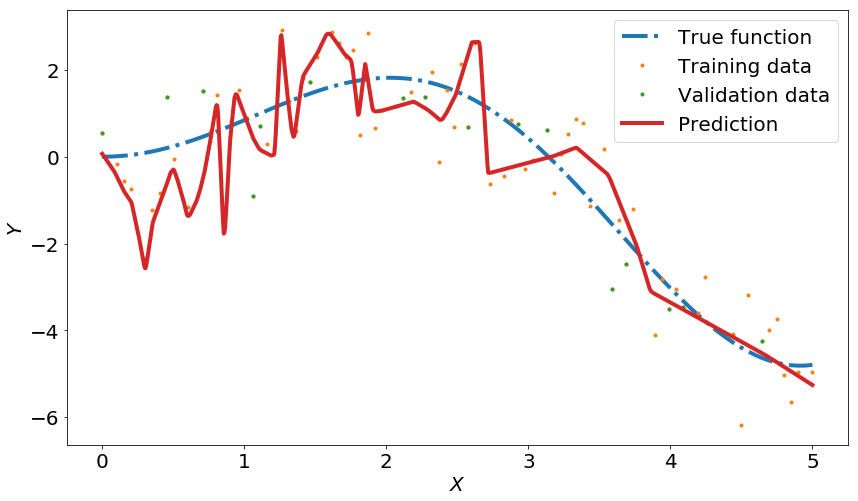

In [8]:
# use our model to predict in the range we want
X_range = np.linspace(0.0, 5, 1000)
y_pred = model.predict(X_range)

# Now plot everything
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.plot(X_true, Y_true, ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_val, Y_val, '.', label='Validation data')
ax.plot(X_range, y_pred, lw=4, label='Prediction')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

The prediction looks pretty bad.  The neural network model is trying to go through all the training points.  This is a classic case of overfitting.  The solution has a lot of oscillations and it rarely fits the validation data.  It may be a good idea to use some kind of regularization.

Let's begin with some penalization methods.

# Penalization
As mentioned in lecture, the loss function can be augmented by an additional term called the penalization term.  Mathematically, the goal is to find the set of weights $W$ that minimize the functional $$J_{R}\left(W; X, y\right) = J\left(W; X, y\right) + \alpha\Omega\left(W\right)$$
where $\alpha$ is called the regularization (or penalization) parameter.  In this lab, $\displaystyle J\left(W; X, y\right)$ is the MSE loss function.

Next, we consider the effect of two different forms for the penalization term: $L_{1}$ and $L_{2}$ penalization.  For reference, 
$$\Omega_{L_{1}} = \frac{1}{2}\left\|W\right\|_{1}$$
and 
$$\Omega_{L_{2}} = \frac{1}{2}\|W\|^{2}_{2}.$$

Note that the biases are not being penalized.

## Exercise
Fit the same network as above ($5$ hidden layers, $100$ nodes per layer, linear output layer), but this time use $L_{2}$ and $L_{1}$ regularization.

**Deliverables:**
* Make two figures, one on top of the other.
* The first figure should contain the following:
  - True solution
  - Training data
  - Validation data
  - Neural network prediction without regularization
  - Neural network prediction with $L_{2}$ regularization
* The second figure should contain the following:
  - True solution
  - Training data
  - Validation data
  - Neural network prediction without regularization
  - Neural network prediction with $L_{1}$ regularization
* **Make sure everything is clearly labeled!**
* Discuss the results.

**Hints:**
* Use `kernel_regularizer=regularizers.l2(alpha)` after the `activation` argument in each of your layers.
* Choose a value for `alpha` that you think works well.  You may need to play around with this a little bit.
* See the `Keras` documentation on regularization:  [Usage of regularizers](https://keras.io/regularizers/)
* Here's some pseudo-code:

```python
from keras import regularizers

num_layers = 5
N = 100
alpha = 

input_dim = 1

### Create network
model_L2 = 
model_L2.add()


### Compile network
model_L2.compile()

### Fit model
L2_reg = model_L2.fit()

### Extract validation data
X_val_L2 = 
Y_val_L2 = 

### REPEAT FOR L1
###
###
###

# PLOT
fig, ax = plt.subplots(2, 1, figsize=(20,14), sharex=True)

ax[0].plot() # Top plots
### ...

ax[0].set_ylabel(r'$Y$', fontsize=20)
ax[0].tick_params(labelsize=20)
ax[0].legend(loc=1, fontsize=20)


ax[1].plot() # Bottom plots
### ...
ax[1].set_xlabel(r'$Y$', fontsize=20)
ax[1].set_ylabel(r'$Y$', fontsize=20)
ax[1].tick_params(labelsize=20)
ax[1].legend(loc=1, fontsize=20)

plt.show()
```

### Solution

In [13]:
from keras import regularizers

num_layers = 5
N = 100
alpha = 0.005

input_dim = 1

model_L2 = models.Sequential()

model_L2.add(layers.Dense(N, input_dim=input_dim, kernel_initializer='normal', activation='tanh', 
                          kernel_regularizer=regularizers.l2(alpha)))

for h in range(num_layers):
    model_L2.add(layers.Dense(N, activation='tanh', kernel_regularizer=regularizers.l2(alpha)))
    
model_L2.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l2(alpha)))

model_L2.compile(loss='mean_squared_error', optimizer='adam')

L2_reg = model_L2.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

# Validation set
X_val_L2 = L2_reg.validation_data[0]
Y_val_L2 = L2_reg.validation_data[1]

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 0s 8ms/step - loss: 8.4886 - val_loss: 6.2393
Epoch 2/2500
64/64 [==============================] - 0s 80us/step - loss: 7.4537 - val_loss: 5.9095
Epoch 3/2500
64/64 [==============================] - 0s 99us/step - loss: 7.2371 - val_loss: 5.9445
Epoch 4/2500
64/64 [==============================] - 0s 82us/step - loss: 7.3563 - val_loss: 5.8667
Epoch 5/2500
64/64 [==============================] - 0s 77us/step - loss: 7.2822 - val_loss: 5.7198
Epoch 6/2500
64/64 [==============================] - 0s 90us/step - loss: 7.0964 - val_loss: 5.6500
Epoch 7/2500
64/64 [==============================] - 0s 113us/step - loss: 6.9756 - val_loss: 5.6776
Epoch 8/2500
64/64 [==============================] - 0s 107us/step - loss: 6.9632 - val_loss: 5.7096
Epoch 9/2500
64/64 [==============================] - 0s 107us/step - loss: 6.9758 - val_loss: 5.6682
Epoch 10/2500
64/64 [========================

Epoch 81/2500
64/64 [==============================] - 0s 96us/step - loss: 4.3651 - val_loss: 3.0660
Epoch 82/2500
64/64 [==============================] - 0s 70us/step - loss: 4.1510 - val_loss: 3.0659
Epoch 83/2500
64/64 [==============================] - 0s 80us/step - loss: 3.8923 - val_loss: 3.4785
Epoch 84/2500
64/64 [==============================] - 0s 67us/step - loss: 3.9973 - val_loss: 3.2292
Epoch 85/2500
64/64 [==============================] - 0s 83us/step - loss: 4.3852 - val_loss: 3.8229
Epoch 86/2500
64/64 [==============================] - 0s 102us/step - loss: 4.0828 - val_loss: 2.9296
Epoch 87/2500
64/64 [==============================] - 0s 65us/step - loss: 3.5434 - val_loss: 2.9190
Epoch 88/2500
64/64 [==============================] - 0s 71us/step - loss: 3.8158 - val_loss: 4.1868
Epoch 89/2500
64/64 [==============================] - 0s 50us/step - loss: 4.1466 - val_loss: 2.8375
Epoch 90/2500
64/64 [==============================] - 0s 66us/step - loss: 3.642

Epoch 161/2500
64/64 [==============================] - 0s 84us/step - loss: 2.6419 - val_loss: 2.8284
Epoch 162/2500
64/64 [==============================] - 0s 63us/step - loss: 2.6372 - val_loss: 2.8390
Epoch 163/2500
64/64 [==============================] - 0s 113us/step - loss: 2.6332 - val_loss: 2.8614
Epoch 164/2500
64/64 [==============================] - 0s 120us/step - loss: 2.6303 - val_loss: 2.8066
Epoch 165/2500
64/64 [==============================] - 0s 80us/step - loss: 2.6273 - val_loss: 2.8557
Epoch 166/2500
64/64 [==============================] - 0s 70us/step - loss: 2.6233 - val_loss: 2.8190
Epoch 167/2500
64/64 [==============================] - 0s 65us/step - loss: 2.6184 - val_loss: 2.8167
Epoch 168/2500
64/64 [==============================] - 0s 99us/step - loss: 2.6156 - val_loss: 2.8421
Epoch 169/2500
64/64 [==============================] - 0s 86us/step - loss: 2.6125 - val_loss: 2.7954
Epoch 170/2500
64/64 [==============================] - 0s 51us/step - 

Epoch 241/2500
64/64 [==============================] - 0s 67us/step - loss: 2.4080 - val_loss: 2.8015
Epoch 242/2500
64/64 [==============================] - 0s 56us/step - loss: 2.4069 - val_loss: 2.5075
Epoch 243/2500
64/64 [==============================] - 0s 65us/step - loss: 2.3895 - val_loss: 2.6611
Epoch 244/2500
64/64 [==============================] - 0s 66us/step - loss: 2.3693 - val_loss: 2.6219
Epoch 245/2500
64/64 [==============================] - 0s 64us/step - loss: 2.3628 - val_loss: 2.5220
Epoch 246/2500
64/64 [==============================] - 0s 62us/step - loss: 2.3692 - val_loss: 2.7238
Epoch 247/2500
64/64 [==============================] - 0s 68us/step - loss: 2.3752 - val_loss: 2.4889
Epoch 248/2500
64/64 [==============================] - 0s 84us/step - loss: 2.3717 - val_loss: 2.6617
Epoch 249/2500
64/64 [==============================] - 0s 55us/step - loss: 2.3585 - val_loss: 2.5462
Epoch 250/2500
64/64 [==============================] - 0s 81us/step - lo

Epoch 321/2500
64/64 [==============================] - 0s 86us/step - loss: 2.2100 - val_loss: 2.3180
Epoch 322/2500
64/64 [==============================] - 0s 57us/step - loss: 2.1765 - val_loss: 2.4167
Epoch 323/2500
64/64 [==============================] - 0s 62us/step - loss: 2.1502 - val_loss: 2.4776
Epoch 324/2500
64/64 [==============================] - 0s 71us/step - loss: 2.1577 - val_loss: 2.2919
Epoch 325/2500
64/64 [==============================] - 0s 64us/step - loss: 2.1764 - val_loss: 2.5219
Epoch 326/2500
64/64 [==============================] - 0s 57us/step - loss: 2.1692 - val_loss: 2.3157
Epoch 327/2500
64/64 [==============================] - 0s 86us/step - loss: 2.1469 - val_loss: 2.3354
Epoch 328/2500
64/64 [==============================] - 0s 62us/step - loss: 2.1392 - val_loss: 2.4464
Epoch 329/2500
64/64 [==============================] - 0s 92us/step - loss: 2.1502 - val_loss: 2.2659
Epoch 330/2500
64/64 [==============================] - 0s 198us/step - l

Epoch 401/2500
64/64 [==============================] - 0s 73us/step - loss: 2.0064 - val_loss: 2.2450
Epoch 402/2500
64/64 [==============================] - 0s 76us/step - loss: 2.0048 - val_loss: 2.2422
Epoch 403/2500
64/64 [==============================] - 0s 71us/step - loss: 2.0032 - val_loss: 2.2402
Epoch 404/2500
64/64 [==============================] - 0s 55us/step - loss: 2.0016 - val_loss: 2.2405
Epoch 405/2500
64/64 [==============================] - 0s 69us/step - loss: 2.0000 - val_loss: 2.2360
Epoch 406/2500
64/64 [==============================] - 0s 66us/step - loss: 1.9984 - val_loss: 2.2385
Epoch 407/2500
64/64 [==============================] - 0s 67us/step - loss: 1.9968 - val_loss: 2.2322
Epoch 408/2500
64/64 [==============================] - 0s 68us/step - loss: 1.9952 - val_loss: 2.2363
Epoch 409/2500
64/64 [==============================] - 0s 115us/step - loss: 1.9936 - val_loss: 2.2289
Epoch 410/2500
64/64 [==============================] - 0s 70us/step - l

Epoch 481/2500
64/64 [==============================] - 0s 80us/step - loss: 1.8892 - val_loss: 2.1262
Epoch 482/2500
64/64 [==============================] - 0s 70us/step - loss: 1.8880 - val_loss: 2.1490
Epoch 483/2500
64/64 [==============================] - 0s 85us/step - loss: 1.8872 - val_loss: 2.1076
Epoch 484/2500
64/64 [==============================] - 0s 82us/step - loss: 1.8864 - val_loss: 2.1541
Epoch 485/2500
64/64 [==============================] - 0s 73us/step - loss: 1.8854 - val_loss: 2.1025
Epoch 486/2500
64/64 [==============================] - 0s 59us/step - loss: 1.8839 - val_loss: 2.1423
Epoch 487/2500
64/64 [==============================] - 0s 77us/step - loss: 1.8821 - val_loss: 2.1093
Epoch 488/2500
64/64 [==============================] - 0s 52us/step - loss: 1.8804 - val_loss: 2.1221
Epoch 489/2500
64/64 [==============================] - 0s 73us/step - loss: 1.8788 - val_loss: 2.1216
Epoch 490/2500
64/64 [==============================] - 0s 73us/step - lo

Epoch 561/2500
64/64 [==============================] - 0s 68us/step - loss: 1.7928 - val_loss: 2.0475
Epoch 562/2500
64/64 [==============================] - 0s 56us/step - loss: 1.7918 - val_loss: 2.0267
Epoch 563/2500
64/64 [==============================] - 0s 60us/step - loss: 1.7907 - val_loss: 2.0496
Epoch 564/2500
64/64 [==============================] - 0s 86us/step - loss: 1.7897 - val_loss: 2.0200
Epoch 565/2500
64/64 [==============================] - 0s 75us/step - loss: 1.7888 - val_loss: 2.0540
Epoch 566/2500
64/64 [==============================] - 0s 65us/step - loss: 1.7880 - val_loss: 2.0110
Epoch 567/2500
64/64 [==============================] - 0s 89us/step - loss: 1.7873 - val_loss: 2.0624
Epoch 568/2500
64/64 [==============================] - 0s 62us/step - loss: 1.7868 - val_loss: 1.9986
Epoch 569/2500
64/64 [==============================] - 0s 61us/step - loss: 1.7867 - val_loss: 2.0773
Epoch 570/2500
64/64 [==============================] - 0s 77us/step - lo

Epoch 641/2500
64/64 [==============================] - 0s 73us/step - loss: 1.7116 - val_loss: 1.9670
Epoch 642/2500
64/64 [==============================] - 0s 69us/step - loss: 1.7106 - val_loss: 1.9592
Epoch 643/2500
64/64 [==============================] - 0s 68us/step - loss: 1.7097 - val_loss: 1.9585
Epoch 644/2500
64/64 [==============================] - 0s 61us/step - loss: 1.7087 - val_loss: 1.9624
Epoch 645/2500
64/64 [==============================] - 0s 51us/step - loss: 1.7078 - val_loss: 1.9522
Epoch 646/2500
64/64 [==============================] - 0s 63us/step - loss: 1.7070 - val_loss: 1.9631
Epoch 647/2500
64/64 [==============================] - 0s 68us/step - loss: 1.7061 - val_loss: 1.9497
Epoch 648/2500
64/64 [==============================] - 0s 81us/step - loss: 1.7052 - val_loss: 1.9604
Epoch 649/2500
64/64 [==============================] - 0s 54us/step - loss: 1.7042 - val_loss: 1.9508
Epoch 650/2500
64/64 [==============================] - 0s 85us/step - lo

Epoch 721/2500
64/64 [==============================] - 0s 74us/step - loss: 1.6426 - val_loss: 1.8996
Epoch 722/2500
64/64 [==============================] - 0s 54us/step - loss: 1.6419 - val_loss: 1.8987
Epoch 723/2500
64/64 [==============================] - 0s 65us/step - loss: 1.6412 - val_loss: 1.8982
Epoch 724/2500
64/64 [==============================] - 0s 79us/step - loss: 1.6404 - val_loss: 1.8972
Epoch 725/2500
64/64 [==============================] - 0s 57us/step - loss: 1.6396 - val_loss: 1.8968
Epoch 726/2500
64/64 [==============================] - 0s 76us/step - loss: 1.6388 - val_loss: 1.8958
Epoch 727/2500
64/64 [==============================] - 0s 48us/step - loss: 1.6380 - val_loss: 1.8954
Epoch 728/2500
64/64 [==============================] - 0s 60us/step - loss: 1.6372 - val_loss: 1.8944
Epoch 729/2500
64/64 [==============================] - 0s 63us/step - loss: 1.6364 - val_loss: 1.8939
Epoch 730/2500
64/64 [==============================] - 0s 56us/step - lo

Epoch 801/2500
64/64 [==============================] - 0s 63us/step - loss: 1.5831 - val_loss: 1.8394
Epoch 802/2500
64/64 [==============================] - 0s 68us/step - loss: 1.5825 - val_loss: 1.8556
Epoch 803/2500
64/64 [==============================] - 0s 85us/step - loss: 1.5818 - val_loss: 1.8354
Epoch 804/2500
64/64 [==============================] - 0s 67us/step - loss: 1.5812 - val_loss: 1.8581
Epoch 805/2500
64/64 [==============================] - 0s 57us/step - loss: 1.5806 - val_loss: 1.8303
Epoch 806/2500
64/64 [==============================] - 0s 65us/step - loss: 1.5801 - val_loss: 1.8621
Epoch 807/2500
64/64 [==============================] - 0s 83us/step - loss: 1.5796 - val_loss: 1.8236
Epoch 808/2500
64/64 [==============================] - 0s 48us/step - loss: 1.5792 - val_loss: 1.8686
Epoch 809/2500
64/64 [==============================] - 0s 59us/step - loss: 1.5788 - val_loss: 1.8149
Epoch 810/2500
64/64 [==============================] - 0s 67us/step - lo

Epoch 881/2500
64/64 [==============================] - 0s 70us/step - loss: 1.5310 - val_loss: 1.7995
Epoch 882/2500
64/64 [==============================] - 0s 67us/step - loss: 1.5305 - val_loss: 1.8055
Epoch 883/2500
64/64 [==============================] - 0s 70us/step - loss: 1.5299 - val_loss: 1.8013
Epoch 884/2500
64/64 [==============================] - 0s 58us/step - loss: 1.5293 - val_loss: 1.8015
Epoch 885/2500
64/64 [==============================] - 0s 53us/step - loss: 1.5287 - val_loss: 1.8032
Epoch 886/2500
64/64 [==============================] - 0s 74us/step - loss: 1.5281 - val_loss: 1.7985
Epoch 887/2500
64/64 [==============================] - 0s 61us/step - loss: 1.5273 - val_loss: 1.8041
Epoch 888/2500
64/64 [==============================] - 0s 76us/step - loss: 1.5269 - val_loss: 1.7969
Epoch 889/2500
64/64 [==============================] - 0s 51us/step - loss: 1.5263 - val_loss: 1.8034
Epoch 890/2500
64/64 [==============================] - 0s 62us/step - lo

Epoch 961/2500
64/64 [==============================] - 0s 66us/step - loss: 1.4858 - val_loss: 1.7677
Epoch 962/2500
64/64 [==============================] - 0s 59us/step - loss: 1.4853 - val_loss: 1.7674
Epoch 963/2500
64/64 [==============================] - 0s 83us/step - loss: 1.4848 - val_loss: 1.7668
Epoch 964/2500
64/64 [==============================] - 0s 61us/step - loss: 1.4842 - val_loss: 1.7666
Epoch 965/2500
64/64 [==============================] - 0s 58us/step - loss: 1.4837 - val_loss: 1.7660
Epoch 966/2500
64/64 [==============================] - 0s 81us/step - loss: 1.4832 - val_loss: 1.7658
Epoch 967/2500
64/64 [==============================] - 0s 65us/step - loss: 1.4826 - val_loss: 1.7652
Epoch 968/2500
64/64 [==============================] - 0s 55us/step - loss: 1.4821 - val_loss: 1.7649
Epoch 969/2500
64/64 [==============================] - 0s 55us/step - loss: 1.4816 - val_loss: 1.7644
Epoch 970/2500
64/64 [==============================] - 0s 48us/step - lo

64/64 [==============================] - 0s 57us/step - loss: 1.4462 - val_loss: 1.7377
Epoch 1041/2500
64/64 [==============================] - 0s 75us/step - loss: 1.4458 - val_loss: 1.7373
Epoch 1042/2500
64/64 [==============================] - 0s 70us/step - loss: 1.4453 - val_loss: 1.7370
Epoch 1043/2500
64/64 [==============================] - 0s 63us/step - loss: 1.4448 - val_loss: 1.7366
Epoch 1044/2500
64/64 [==============================] - 0s 73us/step - loss: 1.4444 - val_loss: 1.7363
Epoch 1045/2500
64/64 [==============================] - 0s 82us/step - loss: 1.4439 - val_loss: 1.7360
Epoch 1046/2500
64/64 [==============================] - 0s 75us/step - loss: 1.4434 - val_loss: 1.7356
Epoch 1047/2500
64/64 [==============================] - 0s 62us/step - loss: 1.4429 - val_loss: 1.7353
Epoch 1048/2500
64/64 [==============================] - 0s 85us/step - loss: 1.4425 - val_loss: 1.7349
Epoch 1049/2500
64/64 [==============================] - 0s 59us/step - loss: 1.

Epoch 1119/2500
64/64 [==============================] - 0s 78us/step - loss: 1.4110 - val_loss: 1.7121
Epoch 1120/2500
64/64 [==============================] - 0s 62us/step - loss: 1.4104 - val_loss: 1.7118
Epoch 1121/2500
64/64 [==============================] - 0s 70us/step - loss: 1.4101 - val_loss: 1.7115
Epoch 1122/2500
64/64 [==============================] - 0s 82us/step - loss: 1.4097 - val_loss: 1.7112
Epoch 1123/2500
64/64 [==============================] - 0s 89us/step - loss: 1.4093 - val_loss: 1.7109
Epoch 1124/2500
64/64 [==============================] - 0s 53us/step - loss: 1.4089 - val_loss: 1.7106
Epoch 1125/2500
64/64 [==============================] - 0s 56us/step - loss: 1.4084 - val_loss: 1.7103
Epoch 1126/2500
64/64 [==============================] - 0s 95us/step - loss: 1.4080 - val_loss: 1.7100
Epoch 1127/2500
64/64 [==============================] - 0s 56us/step - loss: 1.4076 - val_loss: 1.7097
Epoch 1128/2500
64/64 [==============================] - 0s 71us

Epoch 1198/2500
64/64 [==============================] - 0s 71us/step - loss: 1.3794 - val_loss: 1.6898
Epoch 1199/2500
64/64 [==============================] - 0s 70us/step - loss: 1.3790 - val_loss: 1.6895
Epoch 1200/2500
64/64 [==============================] - 0s 79us/step - loss: 1.3786 - val_loss: 1.6893
Epoch 1201/2500
64/64 [==============================] - 0s 76us/step - loss: 1.3783 - val_loss: 1.6889
Epoch 1202/2500
64/64 [==============================] - 0s 65us/step - loss: 1.3779 - val_loss: 1.6888
Epoch 1203/2500
64/64 [==============================] - 0s 67us/step - loss: 1.3775 - val_loss: 1.6884
Epoch 1204/2500
64/64 [==============================] - 0s 65us/step - loss: 1.3771 - val_loss: 1.6883
Epoch 1205/2500
64/64 [==============================] - 0s 49us/step - loss: 1.3768 - val_loss: 1.6879
Epoch 1206/2500
64/64 [==============================] - 0s 60us/step - loss: 1.3764 - val_loss: 1.6878
Epoch 1207/2500
64/64 [==============================] - 0s 104u

Epoch 1277/2500
64/64 [==============================] - 0s 59us/step - loss: 1.3526 - val_loss: 1.6493
Epoch 1278/2500
64/64 [==============================] - 0s 91us/step - loss: 1.3512 - val_loss: 1.6750
Epoch 1279/2500
64/64 [==============================] - 0s 77us/step - loss: 1.3504 - val_loss: 1.6689
Epoch 1280/2500
64/64 [==============================] - 0s 55us/step - loss: 1.3500 - val_loss: 1.6599
Epoch 1281/2500
64/64 [==============================] - 0s 51us/step - loss: 1.3498 - val_loss: 1.6865
Epoch 1282/2500
64/64 [==============================] - 0s 75us/step - loss: 1.3498 - val_loss: 1.6504
Epoch 1283/2500
64/64 [==============================] - 0s 75us/step - loss: 1.3499 - val_loss: 1.6982
Epoch 1284/2500
64/64 [==============================] - 0s 49us/step - loss: 1.3499 - val_loss: 1.6453
Epoch 1285/2500
64/64 [==============================] - 0s 79us/step - loss: 1.3500 - val_loss: 1.7015
Epoch 1286/2500
64/64 [==============================] - 0s 65us

Epoch 1356/2500
64/64 [==============================] - 0s 78us/step - loss: 1.3254 - val_loss: 1.6513
Epoch 1357/2500
64/64 [==============================] - 0s 66us/step - loss: 1.3251 - val_loss: 1.6516
Epoch 1358/2500
64/64 [==============================] - 0s 52us/step - loss: 1.3247 - val_loss: 1.6507
Epoch 1359/2500
64/64 [==============================] - 0s 69us/step - loss: 1.3244 - val_loss: 1.6514
Epoch 1360/2500
64/64 [==============================] - 0s 73us/step - loss: 1.3241 - val_loss: 1.6501
Epoch 1361/2500
64/64 [==============================] - 0s 75us/step - loss: 1.3238 - val_loss: 1.6509
Epoch 1362/2500
64/64 [==============================] - 0s 87us/step - loss: 1.3235 - val_loss: 1.6496
Epoch 1363/2500
64/64 [==============================] - 0s 50us/step - loss: 1.3232 - val_loss: 1.6504
Epoch 1364/2500
64/64 [==============================] - 0s 60us/step - loss: 1.3229 - val_loss: 1.6492
Epoch 1365/2500
64/64 [==============================] - 0s 73us

Epoch 1435/2500
64/64 [==============================] - 0s 66us/step - loss: 1.3020 - val_loss: 1.6337
Epoch 1436/2500
64/64 [==============================] - 0s 59us/step - loss: 1.3018 - val_loss: 1.6335
Epoch 1437/2500
64/64 [==============================] - 0s 73us/step - loss: 1.3014 - val_loss: 1.6333
Epoch 1438/2500
64/64 [==============================] - 0s 71us/step - loss: 1.3012 - val_loss: 1.6331
Epoch 1439/2500
64/64 [==============================] - 0s 67us/step - loss: 1.3009 - val_loss: 1.6328
Epoch 1440/2500
64/64 [==============================] - 0s 64us/step - loss: 1.3006 - val_loss: 1.6326
Epoch 1441/2500
64/64 [==============================] - 0s 59us/step - loss: 1.3003 - val_loss: 1.6324
Epoch 1442/2500
64/64 [==============================] - 0s 90us/step - loss: 1.3001 - val_loss: 1.6322
Epoch 1443/2500
64/64 [==============================] - 0s 51us/step - loss: 1.2998 - val_loss: 1.6320
Epoch 1444/2500
64/64 [==============================] - 0s 48us

Epoch 1514/2500
64/64 [==============================] - 0s 69us/step - loss: 1.2806 - val_loss: 1.6164
Epoch 1515/2500
64/64 [==============================] - 0s 57us/step - loss: 1.2804 - val_loss: 1.6162
Epoch 1516/2500
64/64 [==============================] - 0s 84us/step - loss: 1.2800 - val_loss: 1.6160
Epoch 1517/2500
64/64 [==============================] - 0s 96us/step - loss: 1.2798 - val_loss: 1.6158
Epoch 1518/2500
64/64 [==============================] - 0s 80us/step - loss: 1.2796 - val_loss: 1.6156
Epoch 1519/2500
64/64 [==============================] - 0s 48us/step - loss: 1.2793 - val_loss: 1.6153
Epoch 1520/2500
64/64 [==============================] - 0s 70us/step - loss: 1.2791 - val_loss: 1.6151
Epoch 1521/2500
64/64 [==============================] - 0s 59us/step - loss: 1.2788 - val_loss: 1.6149
Epoch 1522/2500
64/64 [==============================] - 0s 54us/step - loss: 1.2785 - val_loss: 1.6147
Epoch 1523/2500
64/64 [==============================] - 0s 80us

Epoch 1593/2500
64/64 [==============================] - 0s 54us/step - loss: 1.2608 - val_loss: 1.5993
Epoch 1594/2500
64/64 [==============================] - 0s 79us/step - loss: 1.2606 - val_loss: 1.5992
Epoch 1595/2500
64/64 [==============================] - 0s 66us/step - loss: 1.2603 - val_loss: 1.5989
Epoch 1596/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2601 - val_loss: 1.5987
Epoch 1597/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2598 - val_loss: 1.5985
Epoch 1598/2500
64/64 [==============================] - 0s 69us/step - loss: 1.2596 - val_loss: 1.5983
Epoch 1599/2500
64/64 [==============================] - 0s 77us/step - loss: 1.2594 - val_loss: 1.5980
Epoch 1600/2500
64/64 [==============================] - 0s 80us/step - loss: 1.2591 - val_loss: 1.5979
Epoch 1601/2500
64/64 [==============================] - 0s 76us/step - loss: 1.2589 - val_loss: 1.5976
Epoch 1602/2500
64/64 [==============================] - 0s 71us

Epoch 1672/2500
64/64 [==============================] - 0s 51us/step - loss: 1.2445 - val_loss: 1.6184
Epoch 1673/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2446 - val_loss: 1.5476
Epoch 1674/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2448 - val_loss: 1.6221
Epoch 1675/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2448 - val_loss: 1.5444
Epoch 1676/2500
64/64 [==============================] - 0s 60us/step - loss: 1.2448 - val_loss: 1.6230
Epoch 1677/2500
64/64 [==============================] - 0s 72us/step - loss: 1.2445 - val_loss: 1.5438
Epoch 1678/2500
64/64 [==============================] - 0s 66us/step - loss: 1.2443 - val_loss: 1.6193
Epoch 1679/2500
64/64 [==============================] - 0s 81us/step - loss: 1.2437 - val_loss: 1.5472
Epoch 1680/2500
64/64 [==============================] - 0s 51us/step - loss: 1.2431 - val_loss: 1.6109
Epoch 1681/2500
64/64 [==============================] - 0s 46us

Epoch 1751/2500
64/64 [==============================] - 0s 63us/step - loss: 1.2253 - val_loss: 1.5658
Epoch 1752/2500
64/64 [==============================] - 0s 104us/step - loss: 1.2251 - val_loss: 1.5657
Epoch 1753/2500
64/64 [==============================] - 0s 47us/step - loss: 1.2248 - val_loss: 1.5651
Epoch 1754/2500
64/64 [==============================] - 0s 73us/step - loss: 1.2246 - val_loss: 1.5655
Epoch 1755/2500
64/64 [==============================] - 0s 68us/step - loss: 1.2244 - val_loss: 1.5645
Epoch 1756/2500
64/64 [==============================] - 0s 68us/step - loss: 1.2242 - val_loss: 1.5653
Epoch 1757/2500
64/64 [==============================] - 0s 70us/step - loss: 1.2240 - val_loss: 1.5640
Epoch 1758/2500
64/64 [==============================] - 0s 67us/step - loss: 1.2238 - val_loss: 1.5649
Epoch 1759/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2236 - val_loss: 1.5636
Epoch 1760/2500
64/64 [==============================] - 0s 56u

Epoch 1830/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2092 - val_loss: 1.5491
Epoch 1831/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2090 - val_loss: 1.5489
Epoch 1832/2500
64/64 [==============================] - 0s 66us/step - loss: 1.2088 - val_loss: 1.5487
Epoch 1833/2500
64/64 [==============================] - 0s 95us/step - loss: 1.2086 - val_loss: 1.5485
Epoch 1834/2500
64/64 [==============================] - 0s 84us/step - loss: 1.2084 - val_loss: 1.5483
Epoch 1835/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2082 - val_loss: 1.5481
Epoch 1836/2500
64/64 [==============================] - 0s 83us/step - loss: 1.2080 - val_loss: 1.5478
Epoch 1837/2500
64/64 [==============================] - 0s 84us/step - loss: 1.2078 - val_loss: 1.5476
Epoch 1838/2500
64/64 [==============================] - 0s 56us/step - loss: 1.2076 - val_loss: 1.5474
Epoch 1839/2500
64/64 [==============================] - 0s 62us

Epoch 1909/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1941 - val_loss: 1.5325
Epoch 1910/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1939 - val_loss: 1.5323
Epoch 1911/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1937 - val_loss: 1.5321
Epoch 1912/2500
64/64 [==============================] - 0s 62us/step - loss: 1.1935 - val_loss: 1.5319
Epoch 1913/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1933 - val_loss: 1.5317
Epoch 1914/2500
64/64 [==============================] - 0s 71us/step - loss: 1.1931 - val_loss: 1.5315
Epoch 1915/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1929 - val_loss: 1.5313
Epoch 1916/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1928 - val_loss: 1.5311
Epoch 1917/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1926 - val_loss: 1.5309
Epoch 1918/2500
64/64 [==============================] - 0s 103u

Epoch 1988/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1798 - val_loss: 1.5160
Epoch 1989/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1796 - val_loss: 1.5158
Epoch 1990/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1794 - val_loss: 1.5156
Epoch 1991/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1792 - val_loss: 1.5154
Epoch 1992/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1790 - val_loss: 1.5152
Epoch 1993/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1789 - val_loss: 1.5150
Epoch 1994/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1787 - val_loss: 1.5148
Epoch 1995/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1785 - val_loss: 1.5146
Epoch 1996/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1784 - val_loss: 1.5144
Epoch 1997/2500
64/64 [==============================] - 0s 63us

Epoch 2067/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1662 - val_loss: 1.4995
Epoch 2068/2500
64/64 [==============================] - 0s 102us/step - loss: 1.1661 - val_loss: 1.4993
Epoch 2069/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1659 - val_loss: 1.4991
Epoch 2070/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1657 - val_loss: 1.4989
Epoch 2071/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1656 - val_loss: 1.4987
Epoch 2072/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1654 - val_loss: 1.4985
Epoch 2073/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1652 - val_loss: 1.4983
Epoch 2074/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1651 - val_loss: 1.4981
Epoch 2075/2500
64/64 [==============================] - 0s 83us/step - loss: 1.1649 - val_loss: 1.4979
Epoch 2076/2500
64/64 [==============================] - 0s 77u

Epoch 2146/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1533 - val_loss: 1.4830
Epoch 2147/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1532 - val_loss: 1.4828
Epoch 2148/2500
64/64 [==============================] - 0s 89us/step - loss: 1.1530 - val_loss: 1.4826
Epoch 2149/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1529 - val_loss: 1.4823
Epoch 2150/2500
64/64 [==============================] - 0s 89us/step - loss: 1.1527 - val_loss: 1.4821
Epoch 2151/2500
64/64 [==============================] - 0s 75us/step - loss: 1.1525 - val_loss: 1.4819
Epoch 2152/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1524 - val_loss: 1.4817
Epoch 2153/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1522 - val_loss: 1.4815
Epoch 2154/2500
64/64 [==============================] - 0s 86us/step - loss: 1.1521 - val_loss: 1.4813
Epoch 2155/2500
64/64 [==============================] - 0s 67us

Epoch 2225/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1410 - val_loss: 1.4663
Epoch 2226/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1409 - val_loss: 1.4661
Epoch 2227/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1407 - val_loss: 1.4658
Epoch 2228/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1406 - val_loss: 1.4656
Epoch 2229/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1404 - val_loss: 1.4654
Epoch 2230/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1403 - val_loss: 1.4652
Epoch 2231/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1401 - val_loss: 1.4650
Epoch 2232/2500
64/64 [==============================] - 0s 117us/step - loss: 1.1400 - val_loss: 1.4648
Epoch 2233/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1398 - val_loss: 1.4646
Epoch 2234/2500
64/64 [==============================] - 0s 69u

Epoch 2304/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1293 - val_loss: 1.4494
Epoch 2305/2500
64/64 [==============================] - 0s 113us/step - loss: 1.1292 - val_loss: 1.4492
Epoch 2306/2500
64/64 [==============================] - 0s 62us/step - loss: 1.1290 - val_loss: 1.4489
Epoch 2307/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1289 - val_loss: 1.4487
Epoch 2308/2500
64/64 [==============================] - 0s 75us/step - loss: 1.1287 - val_loss: 1.4485
Epoch 2309/2500
64/64 [==============================] - 0s 83us/step - loss: 1.1286 - val_loss: 1.4483
Epoch 2310/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1285 - val_loss: 1.4481
Epoch 2311/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1283 - val_loss: 1.4479
Epoch 2312/2500
64/64 [==============================] - 0s 103us/step - loss: 1.1282 - val_loss: 1.4477
Epoch 2313/2500
64/64 [==============================] - 0s 10

Epoch 2383/2500
64/64 [==============================] - 0s 65us/step - loss: 1.1181 - val_loss: 1.4323
Epoch 2384/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1180 - val_loss: 1.4321
Epoch 2385/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1178 - val_loss: 1.4319
Epoch 2386/2500
64/64 [==============================] - 0s 82us/step - loss: 1.1177 - val_loss: 1.4317
Epoch 2387/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1176 - val_loss: 1.4314
Epoch 2388/2500
64/64 [==============================] - 0s 92us/step - loss: 1.1174 - val_loss: 1.4312
Epoch 2389/2500
64/64 [==============================] - 0s 83us/step - loss: 1.1173 - val_loss: 1.4310
Epoch 2390/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1171 - val_loss: 1.4308
Epoch 2391/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1170 - val_loss: 1.4306
Epoch 2392/2500
64/64 [==============================] - 0s 66us

Epoch 2462/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1074 - val_loss: 1.4152
Epoch 2463/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1073 - val_loss: 1.4150
Epoch 2464/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1072 - val_loss: 1.4148
Epoch 2465/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1070 - val_loss: 1.4146
Epoch 2466/2500
64/64 [==============================] - 0s 92us/step - loss: 1.1069 - val_loss: 1.4143
Epoch 2467/2500
64/64 [==============================] - 0s 52us/step - loss: 1.1067 - val_loss: 1.4141
Epoch 2468/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1066 - val_loss: 1.4139
Epoch 2469/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1065 - val_loss: 1.4137
Epoch 2470/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1064 - val_loss: 1.4135
Epoch 2471/2500
64/64 [==============================] - 0s 61us

In [14]:
model_L1 = models.Sequential()

model_L1.add(layers.Dense(N, input_dim=input_dim, kernel_initializer='normal', activation='tanh', 
                          kernel_regularizer=regularizers.l1(alpha)))

for h in range(num_layers):
    model_L1.add(layers.Dense(N, activation='tanh', kernel_regularizer=regularizers.l1(alpha)))
    
model_L1.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l1(alpha)))

model_L1.compile(loss='mean_squared_error', optimizer='adam')
L1_reg = model_L1.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2)

X_val_L1 = L1_reg.validation_data[0]
Y_val_L1 = L1_reg.validation_data[1]

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 8ms/step - loss: 27.3567 - val_loss: 25.3241
Epoch 2/2500
64/64 [==============================] - 0s 43us/step - loss: 26.5550 - val_loss: 24.9764
Epoch 3/2500
64/64 [==============================] - 0s 74us/step - loss: 26.2975 - val_loss: 24.8218
Epoch 4/2500
64/64 [==============================] - 0s 72us/step - loss: 26.2036 - val_loss: 24.6033
Epoch 5/2500
64/64 [==============================] - 0s 63us/step - loss: 25.9906 - val_loss: 24.3510
Epoch 6/2500
64/64 [==============================] - 0s 79us/step - loss: 25.7100 - val_loss: 24.1468
Epoch 7/2500
64/64 [==============================] - 0s 101us/step - loss: 25.4693 - val_loss: 23.9942
Epoch 8/2500
64/64 [==============================] - 0s 74us/step - loss: 25.2891 - val_loss: 23.8394
Epoch 9/2500
64/64 [==============================] - 0s 67us/step - loss: 25.1217 - val_loss: 23.6382
Epoch 10/2500
64/64 [========

Epoch 80/2500
64/64 [==============================] - 0s 82us/step - loss: 14.0235 - val_loss: 12.4264
Epoch 81/2500
64/64 [==============================] - 0s 82us/step - loss: 13.8951 - val_loss: 12.3001
Epoch 82/2500
64/64 [==============================] - 0s 61us/step - loss: 13.7672 - val_loss: 12.1753
Epoch 83/2500
64/64 [==============================] - 0s 61us/step - loss: 13.6402 - val_loss: 12.0510
Epoch 84/2500
64/64 [==============================] - 0s 67us/step - loss: 13.5140 - val_loss: 11.9259
Epoch 85/2500
64/64 [==============================] - 0s 110us/step - loss: 13.3877 - val_loss: 11.8014
Epoch 86/2500
64/64 [==============================] - 0s 79us/step - loss: 13.2628 - val_loss: 11.6775
Epoch 87/2500
64/64 [==============================] - 0s 77us/step - loss: 13.1385 - val_loss: 11.5544
Epoch 88/2500
64/64 [==============================] - 0s 61us/step - loss: 13.0146 - val_loss: 11.4326
Epoch 89/2500
64/64 [==============================] - 0s 68us/

Epoch 160/2500
64/64 [==============================] - 0s 70us/step - loss: 5.0452 - val_loss: 4.7616
Epoch 161/2500
64/64 [==============================] - 0s 56us/step - loss: 5.0756 - val_loss: 4.7605
Epoch 162/2500
64/64 [==============================] - 0s 56us/step - loss: 5.1017 - val_loss: 4.8655
Epoch 163/2500
64/64 [==============================] - 0s 64us/step - loss: 4.7498 - val_loss: 5.4271
Epoch 164/2500
64/64 [==============================] - 0s 67us/step - loss: 5.0270 - val_loss: 4.7730
Epoch 165/2500
64/64 [==============================] - 0s 64us/step - loss: 4.6428 - val_loss: 4.5450
Epoch 166/2500
64/64 [==============================] - 0s 60us/step - loss: 4.8043 - val_loss: 4.4878
Epoch 167/2500
64/64 [==============================] - 0s 85us/step - loss: 4.6557 - val_loss: 4.8060
Epoch 168/2500
64/64 [==============================] - 0s 62us/step - loss: 4.5557 - val_loss: 5.0302
Epoch 169/2500
64/64 [==============================] - 0s 88us/step - lo

Epoch 240/2500
64/64 [==============================] - 0s 69us/step - loss: 2.9805 - val_loss: 3.2415
Epoch 241/2500
64/64 [==============================] - 0s 50us/step - loss: 2.9695 - val_loss: 3.2278
Epoch 242/2500
64/64 [==============================] - 0s 75us/step - loss: 2.9587 - val_loss: 3.2121
Epoch 243/2500
64/64 [==============================] - 0s 89us/step - loss: 2.9479 - val_loss: 3.2025
Epoch 244/2500
64/64 [==============================] - 0s 64us/step - loss: 2.9374 - val_loss: 3.1975
Epoch 245/2500
64/64 [==============================] - 0s 73us/step - loss: 2.9270 - val_loss: 3.1895
Epoch 246/2500
64/64 [==============================] - 0s 62us/step - loss: 2.9166 - val_loss: 3.1766
Epoch 247/2500
64/64 [==============================] - 0s 67us/step - loss: 2.9063 - val_loss: 3.1641
Epoch 248/2500
64/64 [==============================] - 0s 48us/step - loss: 2.8962 - val_loss: 3.1564
Epoch 249/2500
64/64 [==============================] - 0s 66us/step - lo

Epoch 320/2500
64/64 [==============================] - 0s 80us/step - loss: 2.3760 - val_loss: 2.6742
Epoch 321/2500
64/64 [==============================] - 0s 65us/step - loss: 2.3709 - val_loss: 2.6694
Epoch 322/2500
64/64 [==============================] - 0s 59us/step - loss: 2.3659 - val_loss: 2.6653
Epoch 323/2500
64/64 [==============================] - 0s 59us/step - loss: 2.3610 - val_loss: 2.6612
Epoch 324/2500
64/64 [==============================] - 0s 78us/step - loss: 2.3560 - val_loss: 2.6564
Epoch 325/2500
64/64 [==============================] - 0s 63us/step - loss: 2.3509 - val_loss: 2.6516
Epoch 326/2500
64/64 [==============================] - 0s 68us/step - loss: 2.3460 - val_loss: 2.6473
Epoch 327/2500
64/64 [==============================] - 0s 64us/step - loss: 2.3411 - val_loss: 2.6430
Epoch 328/2500
64/64 [==============================] - 0s 59us/step - loss: 2.3363 - val_loss: 2.6381
Epoch 329/2500
64/64 [==============================] - 0s 60us/step - lo

Epoch 400/2500
64/64 [==============================] - 0s 76us/step - loss: 2.0562 - val_loss: 2.3807
Epoch 401/2500
64/64 [==============================] - 0s 54us/step - loss: 2.0531 - val_loss: 2.3784
Epoch 402/2500
64/64 [==============================] - 0s 49us/step - loss: 2.0500 - val_loss: 2.3757
Epoch 403/2500
64/64 [==============================] - 0s 64us/step - loss: 2.0469 - val_loss: 2.3725
Epoch 404/2500
64/64 [==============================] - 0s 62us/step - loss: 2.0439 - val_loss: 2.3691
Epoch 405/2500
64/64 [==============================] - 0s 78us/step - loss: 2.0409 - val_loss: 2.3662
Epoch 406/2500
64/64 [==============================] - 0s 75us/step - loss: 2.0374 - val_loss: 2.3637
Epoch 407/2500
64/64 [==============================] - 0s 64us/step - loss: 2.0348 - val_loss: 2.3608
Epoch 408/2500
64/64 [==============================] - 0s 75us/step - loss: 2.0318 - val_loss: 2.3578
Epoch 409/2500
64/64 [==============================] - 0s 56us/step - lo

Epoch 480/2500
64/64 [==============================] - 0s 55us/step - loss: 1.8533 - val_loss: 2.1938
Epoch 481/2500
64/64 [==============================] - 0s 59us/step - loss: 1.8513 - val_loss: 2.1917
Epoch 482/2500
64/64 [==============================] - 0s 66us/step - loss: 1.8492 - val_loss: 2.1896
Epoch 483/2500
64/64 [==============================] - 0s 62us/step - loss: 1.8471 - val_loss: 2.1877
Epoch 484/2500
64/64 [==============================] - 0s 66us/step - loss: 1.8452 - val_loss: 2.1855
Epoch 485/2500
64/64 [==============================] - 0s 75us/step - loss: 1.8431 - val_loss: 2.1833
Epoch 486/2500
64/64 [==============================] - 0s 70us/step - loss: 1.8410 - val_loss: 2.1818
Epoch 487/2500
64/64 [==============================] - 0s 65us/step - loss: 1.8391 - val_loss: 2.1801
Epoch 488/2500
64/64 [==============================] - 0s 85us/step - loss: 1.8371 - val_loss: 2.1780
Epoch 489/2500
64/64 [==============================] - 0s 59us/step - lo

Epoch 560/2500
64/64 [==============================] - 0s 67us/step - loss: 1.7119 - val_loss: 2.0594
Epoch 561/2500
64/64 [==============================] - 0s 99us/step - loss: 1.7105 - val_loss: 2.0582
Epoch 562/2500
64/64 [==============================] - 0s 66us/step - loss: 1.7090 - val_loss: 2.0573
Epoch 563/2500
64/64 [==============================] - 0s 76us/step - loss: 1.7073 - val_loss: 2.0560
Epoch 564/2500
64/64 [==============================] - 0s 74us/step - loss: 1.7059 - val_loss: 2.0539
Epoch 565/2500
64/64 [==============================] - 0s 87us/step - loss: 1.7044 - val_loss: 2.0521
Epoch 566/2500
64/64 [==============================] - 0s 70us/step - loss: 1.7029 - val_loss: 2.0509
Epoch 567/2500
64/64 [==============================] - 0s 66us/step - loss: 1.7014 - val_loss: 2.0492
Epoch 568/2500
64/64 [==============================] - 0s 96us/step - loss: 1.6999 - val_loss: 2.0475
Epoch 569/2500
64/64 [==============================] - 0s 56us/step - lo

Epoch 640/2500
64/64 [==============================] - 0s 67us/step - loss: 1.6089 - val_loss: 1.9626
Epoch 641/2500
64/64 [==============================] - 0s 53us/step - loss: 1.6078 - val_loss: 1.9615
Epoch 642/2500
64/64 [==============================] - 0s 72us/step - loss: 1.6066 - val_loss: 1.9603
Epoch 643/2500
64/64 [==============================] - 0s 58us/step - loss: 1.6055 - val_loss: 1.9587
Epoch 644/2500
64/64 [==============================] - 0s 69us/step - loss: 1.6046 - val_loss: 1.9576
Epoch 645/2500
64/64 [==============================] - 0s 69us/step - loss: 1.6036 - val_loss: 1.9575
Epoch 646/2500
64/64 [==============================] - 0s 66us/step - loss: 1.6025 - val_loss: 1.9566
Epoch 647/2500
64/64 [==============================] - 0s 61us/step - loss: 1.6014 - val_loss: 1.9552
Epoch 648/2500
64/64 [==============================] - 0s 74us/step - loss: 1.6004 - val_loss: 1.9543
Epoch 649/2500
64/64 [==============================] - 0s 76us/step - lo

Epoch 720/2500
64/64 [==============================] - 0s 65us/step - loss: 1.5314 - val_loss: 1.8877
Epoch 721/2500
64/64 [==============================] - 0s 58us/step - loss: 1.5307 - val_loss: 1.8866
Epoch 722/2500
64/64 [==============================] - 0s 69us/step - loss: 1.5298 - val_loss: 1.8853
Epoch 723/2500
64/64 [==============================] - 0s 53us/step - loss: 1.5288 - val_loss: 1.8847
Epoch 724/2500
64/64 [==============================] - 0s 76us/step - loss: 1.5281 - val_loss: 1.8842
Epoch 725/2500
64/64 [==============================] - 0s 60us/step - loss: 1.5273 - val_loss: 1.8836
Epoch 726/2500
64/64 [==============================] - 0s 48us/step - loss: 1.5264 - val_loss: 1.8824
Epoch 727/2500
64/64 [==============================] - 0s 59us/step - loss: 1.5256 - val_loss: 1.8813
Epoch 728/2500
64/64 [==============================] - 0s 66us/step - loss: 1.5248 - val_loss: 1.8806
Epoch 729/2500
64/64 [==============================] - 0s 64us/step - lo

Epoch 800/2500
64/64 [==============================] - 0s 86us/step - loss: 1.4705 - val_loss: 1.8275
Epoch 801/2500
64/64 [==============================] - 0s 75us/step - loss: 1.4699 - val_loss: 1.8266
Epoch 802/2500
64/64 [==============================] - 0s 61us/step - loss: 1.4693 - val_loss: 1.8263
Epoch 803/2500
64/64 [==============================] - 0s 67us/step - loss: 1.4685 - val_loss: 1.8262
Epoch 804/2500
64/64 [==============================] - 0s 73us/step - loss: 1.4679 - val_loss: 1.8251
Epoch 805/2500
64/64 [==============================] - 0s 64us/step - loss: 1.4673 - val_loss: 1.8243
Epoch 806/2500
64/64 [==============================] - 0s 77us/step - loss: 1.4665 - val_loss: 1.8237
Epoch 807/2500
64/64 [==============================] - 0s 58us/step - loss: 1.4658 - val_loss: 1.8222
Epoch 808/2500
64/64 [==============================] - 0s 77us/step - loss: 1.4652 - val_loss: 1.8211
Epoch 809/2500
64/64 [==============================] - 0s 59us/step - lo

Epoch 880/2500
64/64 [==============================] - 0s 70us/step - loss: 1.4214 - val_loss: 1.7781
Epoch 881/2500
64/64 [==============================] - 0s 65us/step - loss: 1.4210 - val_loss: 1.7778
Epoch 882/2500
64/64 [==============================] - 0s 66us/step - loss: 1.4204 - val_loss: 1.7772
Epoch 883/2500
64/64 [==============================] - 0s 69us/step - loss: 1.4198 - val_loss: 1.7776
Epoch 884/2500
64/64 [==============================] - 0s 64us/step - loss: 1.4194 - val_loss: 1.7772
Epoch 885/2500
64/64 [==============================] - 0s 78us/step - loss: 1.4189 - val_loss: 1.7764
Epoch 886/2500
64/64 [==============================] - 0s 80us/step - loss: 1.4183 - val_loss: 1.7756
Epoch 887/2500
64/64 [==============================] - 0s 75us/step - loss: 1.4177 - val_loss: 1.7745
Epoch 888/2500
64/64 [==============================] - 0s 94us/step - loss: 1.4171 - val_loss: 1.7740
Epoch 889/2500
64/64 [==============================] - 0s 74us/step - lo

Epoch 960/2500
64/64 [==============================] - 0s 60us/step - loss: 1.3809 - val_loss: 1.7360
Epoch 961/2500
64/64 [==============================] - 0s 75us/step - loss: 1.3805 - val_loss: 1.7365
Epoch 962/2500
64/64 [==============================] - 0s 61us/step - loss: 1.3800 - val_loss: 1.7365
Epoch 963/2500
64/64 [==============================] - 0s 92us/step - loss: 1.3796 - val_loss: 1.7347
Epoch 964/2500
64/64 [==============================] - 0s 63us/step - loss: 1.3792 - val_loss: 1.7361
Epoch 965/2500
64/64 [==============================] - 0s 79us/step - loss: 1.3786 - val_loss: 1.7347
Epoch 966/2500
64/64 [==============================] - 0s 57us/step - loss: 1.3781 - val_loss: 1.7356
Epoch 967/2500
64/64 [==============================] - 0s 72us/step - loss: 1.3776 - val_loss: 1.7362
Epoch 968/2500
64/64 [==============================] - 0s 92us/step - loss: 1.3772 - val_loss: 1.7352
Epoch 969/2500
64/64 [==============================] - 0s 75us/step - lo

64/64 [==============================] - 0s 69us/step - loss: 1.3462 - val_loss: 1.7029
Epoch 1040/2500
64/64 [==============================] - 0s 93us/step - loss: 1.3457 - val_loss: 1.7005
Epoch 1041/2500
64/64 [==============================] - 0s 61us/step - loss: 1.3453 - val_loss: 1.7021
Epoch 1042/2500
64/64 [==============================] - 0s 73us/step - loss: 1.3449 - val_loss: 1.7009
Epoch 1043/2500
64/64 [==============================] - 0s 86us/step - loss: 1.3445 - val_loss: 1.7003
Epoch 1044/2500
64/64 [==============================] - 0s 65us/step - loss: 1.3441 - val_loss: 1.7003
Epoch 1045/2500
64/64 [==============================] - 0s 61us/step - loss: 1.3437 - val_loss: 1.6980
Epoch 1046/2500
64/64 [==============================] - 0s 78us/step - loss: 1.3432 - val_loss: 1.7002
Epoch 1047/2500
64/64 [==============================] - 0s 55us/step - loss: 1.3429 - val_loss: 1.6973
Epoch 1048/2500
64/64 [==============================] - 0s 74us/step - loss: 1.

Epoch 1118/2500
64/64 [==============================] - 0s 55us/step - loss: 1.3163 - val_loss: 1.6572
Epoch 1119/2500
64/64 [==============================] - 0s 66us/step - loss: 1.3160 - val_loss: 1.6873
Epoch 1120/2500
64/64 [==============================] - 0s 65us/step - loss: 1.3157 - val_loss: 1.6579
Epoch 1121/2500
64/64 [==============================] - 0s 65us/step - loss: 1.3153 - val_loss: 1.6847
Epoch 1122/2500
64/64 [==============================] - 0s 74us/step - loss: 1.3149 - val_loss: 1.6582
Epoch 1123/2500
64/64 [==============================] - 0s 66us/step - loss: 1.3144 - val_loss: 1.6808
Epoch 1124/2500
64/64 [==============================] - 0s 88us/step - loss: 1.3142 - val_loss: 1.6592
Epoch 1125/2500
64/64 [==============================] - 0s 69us/step - loss: 1.3137 - val_loss: 1.6760
Epoch 1126/2500
64/64 [==============================] - 0s 85us/step - loss: 1.3131 - val_loss: 1.6612
Epoch 1127/2500
64/64 [==============================] - 0s 69us

Epoch 1197/2500
64/64 [==============================] - 0s 87us/step - loss: 1.2903 - val_loss: 1.6402
Epoch 1198/2500
64/64 [==============================] - 0s 92us/step - loss: 1.2898 - val_loss: 1.6481
Epoch 1199/2500
64/64 [==============================] - 0s 85us/step - loss: 1.2893 - val_loss: 1.6441
Epoch 1200/2500
64/64 [==============================] - 0s 67us/step - loss: 1.2891 - val_loss: 1.6441
Epoch 1201/2500
64/64 [==============================] - 0s 84us/step - loss: 1.2889 - val_loss: 1.6453
Epoch 1202/2500
64/64 [==============================] - 0s 74us/step - loss: 1.2885 - val_loss: 1.6402
Epoch 1203/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2881 - val_loss: 1.6456
Epoch 1204/2500
64/64 [==============================] - 0s 59us/step - loss: 1.2880 - val_loss: 1.6385
Epoch 1205/2500
64/64 [==============================] - 0s 98us/step - loss: 1.2877 - val_loss: 1.6463
Epoch 1206/2500
64/64 [==============================] - 0s 61us

Epoch 1276/2500
64/64 [==============================] - 0s 58us/step - loss: 1.2691 - val_loss: 1.6367
Epoch 1277/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2686 - val_loss: 1.6086
Epoch 1278/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2682 - val_loss: 1.6309
Epoch 1279/2500
64/64 [==============================] - 0s 47us/step - loss: 1.2676 - val_loss: 1.6131
Epoch 1280/2500
64/64 [==============================] - 0s 62us/step - loss: 1.2672 - val_loss: 1.6258
Epoch 1281/2500
64/64 [==============================] - 0s 77us/step - loss: 1.2669 - val_loss: 1.6158
Epoch 1282/2500
64/64 [==============================] - 0s 69us/step - loss: 1.2666 - val_loss: 1.6209
Epoch 1283/2500
64/64 [==============================] - 0s 66us/step - loss: 1.2662 - val_loss: 1.6175
Epoch 1284/2500
64/64 [==============================] - 0s 67us/step - loss: 1.2661 - val_loss: 1.6179
Epoch 1285/2500
64/64 [==============================] - 0s 59us

Epoch 1355/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2491 - val_loss: 1.5926
Epoch 1356/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2490 - val_loss: 1.6095
Epoch 1357/2500
64/64 [==============================] - 0s 101us/step - loss: 1.2488 - val_loss: 1.5880
Epoch 1358/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2487 - val_loss: 1.6139
Epoch 1359/2500
64/64 [==============================] - 0s 77us/step - loss: 1.2487 - val_loss: 1.5846
Epoch 1360/2500
64/64 [==============================] - 0s 70us/step - loss: 1.2487 - val_loss: 1.6162
Epoch 1361/2500
64/64 [==============================] - 0s 72us/step - loss: 1.2485 - val_loss: 1.5824
Epoch 1362/2500
64/64 [==============================] - 0s 93us/step - loss: 1.2483 - val_loss: 1.6174
Epoch 1363/2500
64/64 [==============================] - 0s 59us/step - loss: 1.2482 - val_loss: 1.5817
Epoch 1364/2500
64/64 [==============================] - 0s 73u

Epoch 1434/2500
64/64 [==============================] - 0s 68us/step - loss: 1.2328 - val_loss: 1.6079
Epoch 1435/2500
64/64 [==============================] - 0s 97us/step - loss: 1.2333 - val_loss: 1.5538
Epoch 1436/2500
64/64 [==============================] - 0s 92us/step - loss: 1.2337 - val_loss: 1.6152
Epoch 1437/2500
64/64 [==============================] - 0s 77us/step - loss: 1.2341 - val_loss: 1.5481
Epoch 1438/2500
64/64 [==============================] - 0s 50us/step - loss: 1.2344 - val_loss: 1.6187
Epoch 1439/2500
64/64 [==============================] - 0s 69us/step - loss: 1.2345 - val_loss: 1.5465
Epoch 1440/2500
64/64 [==============================] - 0s 52us/step - loss: 1.2343 - val_loss: 1.6142
Epoch 1441/2500
64/64 [==============================] - 0s 105us/step - loss: 1.2335 - val_loss: 1.5504
Epoch 1442/2500
64/64 [==============================] - 0s 62us/step - loss: 1.2323 - val_loss: 1.6009
Epoch 1443/2500
64/64 [==============================] - 0s 56u

Epoch 1513/2500
64/64 [==============================] - 0s 64us/step - loss: 1.2163 - val_loss: 1.5803
Epoch 1514/2500
64/64 [==============================] - 0s 62us/step - loss: 1.2168 - val_loss: 1.5390
Epoch 1515/2500
64/64 [==============================] - 0s 70us/step - loss: 1.2174 - val_loss: 1.5898
Epoch 1516/2500
64/64 [==============================] - 0s 109us/step - loss: 1.2177 - val_loss: 1.5370
Epoch 1517/2500
64/64 [==============================] - 0s 69us/step - loss: 1.2175 - val_loss: 1.5872
Epoch 1518/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2170 - val_loss: 1.5418
Epoch 1519/2500
64/64 [==============================] - 0s 80us/step - loss: 1.2162 - val_loss: 1.5764
Epoch 1520/2500
64/64 [==============================] - 0s 70us/step - loss: 1.2154 - val_loss: 1.5523
Epoch 1521/2500
64/64 [==============================] - 0s 88us/step - loss: 1.2147 - val_loss: 1.5647
Epoch 1522/2500
64/64 [==============================] - 0s 62u

Epoch 1592/2500
64/64 [==============================] - 0s 61us/step - loss: 1.2025 - val_loss: 1.5291
Epoch 1593/2500
64/64 [==============================] - 0s 106us/step - loss: 1.2021 - val_loss: 1.5594
Epoch 1594/2500
64/64 [==============================] - 0s 54us/step - loss: 1.2018 - val_loss: 1.5323
Epoch 1595/2500
64/64 [==============================] - 0s 75us/step - loss: 1.2015 - val_loss: 1.5542
Epoch 1596/2500
64/64 [==============================] - 0s 80us/step - loss: 1.2012 - val_loss: 1.5354
Epoch 1597/2500
64/64 [==============================] - 0s 63us/step - loss: 1.2010 - val_loss: 1.5511
Epoch 1598/2500
64/64 [==============================] - 0s 71us/step - loss: 1.2007 - val_loss: 1.5388
Epoch 1599/2500
64/64 [==============================] - 0s 65us/step - loss: 1.2005 - val_loss: 1.5494
Epoch 1600/2500
64/64 [==============================] - 0s 72us/step - loss: 1.2002 - val_loss: 1.5403
Epoch 1601/2500
64/64 [==============================] - 0s 80u

Epoch 1671/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1888 - val_loss: 1.5375
Epoch 1672/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1887 - val_loss: 1.5221
Epoch 1673/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1887 - val_loss: 1.5395
Epoch 1674/2500
64/64 [==============================] - 0s 54us/step - loss: 1.1886 - val_loss: 1.5202
Epoch 1675/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1886 - val_loss: 1.5422
Epoch 1676/2500
64/64 [==============================] - 0s 61us/step - loss: 1.1884 - val_loss: 1.5164
Epoch 1677/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1883 - val_loss: 1.5457
Epoch 1678/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1884 - val_loss: 1.5118
Epoch 1679/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1885 - val_loss: 1.5508
Epoch 1680/2500
64/64 [==============================] - 0s 62us

Epoch 1750/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1792 - val_loss: 1.4939
Epoch 1751/2500
64/64 [==============================] - 0s 55us/step - loss: 1.1791 - val_loss: 1.5401
Epoch 1752/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1789 - val_loss: 1.4970
Epoch 1753/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1785 - val_loss: 1.5357
Epoch 1754/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1781 - val_loss: 1.5028
Epoch 1755/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1777 - val_loss: 1.5270
Epoch 1756/2500
64/64 [==============================] - 0s 75us/step - loss: 1.1771 - val_loss: 1.5091
Epoch 1757/2500
64/64 [==============================] - 0s 53us/step - loss: 1.1768 - val_loss: 1.5189
Epoch 1758/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1766 - val_loss: 1.5147
Epoch 1759/2500
64/64 [==============================] - 0s 63us

Epoch 1829/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1677 - val_loss: 1.4954
Epoch 1830/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1677 - val_loss: 1.5123
Epoch 1831/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1676 - val_loss: 1.4918
Epoch 1832/2500
64/64 [==============================] - 0s 103us/step - loss: 1.1675 - val_loss: 1.5150
Epoch 1833/2500
64/64 [==============================] - 0s 85us/step - loss: 1.1675 - val_loss: 1.4890
Epoch 1834/2500
64/64 [==============================] - 0s 88us/step - loss: 1.1677 - val_loss: 1.5181
Epoch 1835/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1677 - val_loss: 1.4869
Epoch 1836/2500
64/64 [==============================] - 0s 78us/step - loss: 1.1676 - val_loss: 1.5206
Epoch 1837/2500
64/64 [==============================] - 0s 85us/step - loss: 1.1676 - val_loss: 1.4849
Epoch 1838/2500
64/64 [==============================] - 0s 80u

Epoch 1908/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1588 - val_loss: 1.4877
Epoch 1909/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1589 - val_loss: 1.4965
Epoch 1910/2500
64/64 [==============================] - 0s 70us/step - loss: 1.1587 - val_loss: 1.4850
Epoch 1911/2500
64/64 [==============================] - 0s 88us/step - loss: 1.1587 - val_loss: 1.4985
Epoch 1912/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1586 - val_loss: 1.4816
Epoch 1913/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1586 - val_loss: 1.5026
Epoch 1914/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1586 - val_loss: 1.4777
Epoch 1915/2500
64/64 [==============================] - 0s 48us/step - loss: 1.1587 - val_loss: 1.5082
Epoch 1916/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1588 - val_loss: 1.4727
Epoch 1917/2500
64/64 [==============================] - 0s 81us

Epoch 1987/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1505 - val_loss: 1.4836
Epoch 1988/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1505 - val_loss: 1.4773
Epoch 1989/2500
64/64 [==============================] - 0s 78us/step - loss: 1.1505 - val_loss: 1.4833
Epoch 1990/2500
64/64 [==============================] - 0s 101us/step - loss: 1.1503 - val_loss: 1.4750
Epoch 1991/2500
64/64 [==============================] - 0s 84us/step - loss: 1.1501 - val_loss: 1.4841
Epoch 1992/2500
64/64 [==============================] - 0s 86us/step - loss: 1.1500 - val_loss: 1.4737
Epoch 1993/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1499 - val_loss: 1.4869
Epoch 1994/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1499 - val_loss: 1.4712
Epoch 1995/2500
64/64 [==============================] - 0s 51us/step - loss: 1.1499 - val_loss: 1.4894
Epoch 1996/2500
64/64 [==============================] - 0s 70u

Epoch 2066/2500
64/64 [==============================] - 0s 87us/step - loss: 1.1425 - val_loss: 1.4676
Epoch 2067/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1424 - val_loss: 1.4678
Epoch 2068/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1422 - val_loss: 1.4691
Epoch 2069/2500
64/64 [==============================] - 0s 60us/step - loss: 1.1420 - val_loss: 1.4674
Epoch 2070/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1420 - val_loss: 1.4711
Epoch 2071/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1419 - val_loss: 1.4661
Epoch 2072/2500
64/64 [==============================] - 0s 84us/step - loss: 1.1417 - val_loss: 1.4720
Epoch 2073/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1417 - val_loss: 1.4637
Epoch 2074/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1417 - val_loss: 1.4725
Epoch 2075/2500
64/64 [==============================] - 0s 69us

Epoch 2145/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1349 - val_loss: 1.4527
Epoch 2146/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1347 - val_loss: 1.4603
Epoch 2147/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1346 - val_loss: 1.4565
Epoch 2148/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1345 - val_loss: 1.4566
Epoch 2149/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1344 - val_loss: 1.4592
Epoch 2150/2500
64/64 [==============================] - 0s 84us/step - loss: 1.1342 - val_loss: 1.4537
Epoch 2151/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1341 - val_loss: 1.4621
Epoch 2152/2500
64/64 [==============================] - 0s 79us/step - loss: 1.1341 - val_loss: 1.4507
Epoch 2153/2500
64/64 [==============================] - 0s 69us/step - loss: 1.1340 - val_loss: 1.4660
Epoch 2154/2500
64/64 [==============================] - 0s 64us

Epoch 2224/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1282 - val_loss: 1.4297
Epoch 2225/2500
64/64 [==============================] - 0s 64us/step - loss: 1.1281 - val_loss: 1.4634
Epoch 2226/2500
64/64 [==============================] - 0s 69us/step - loss: 1.1278 - val_loss: 1.4323
Epoch 2227/2500
64/64 [==============================] - 0s 93us/step - loss: 1.1275 - val_loss: 1.4596
Epoch 2228/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1273 - val_loss: 1.4355
Epoch 2229/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1271 - val_loss: 1.4554
Epoch 2230/2500
64/64 [==============================] - 0s 57us/step - loss: 1.1269 - val_loss: 1.4386
Epoch 2231/2500
64/64 [==============================] - 0s 81us/step - loss: 1.1267 - val_loss: 1.4517
Epoch 2232/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1264 - val_loss: 1.4413
Epoch 2233/2500
64/64 [==============================] - 0s 74us

Epoch 2303/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1204 - val_loss: 1.4554
Epoch 2304/2500
64/64 [==============================] - 0s 76us/step - loss: 1.1206 - val_loss: 1.4194
Epoch 2305/2500
64/64 [==============================] - 0s 75us/step - loss: 1.1208 - val_loss: 1.4594
Epoch 2306/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1207 - val_loss: 1.4155
Epoch 2307/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1208 - val_loss: 1.4608
Epoch 2308/2500
64/64 [==============================] - 0s 67us/step - loss: 1.1209 - val_loss: 1.4133
Epoch 2309/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1209 - val_loss: 1.4604
Epoch 2310/2500
64/64 [==============================] - 0s 82us/step - loss: 1.1208 - val_loss: 1.4144
Epoch 2311/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1205 - val_loss: 1.4569
Epoch 2312/2500
64/64 [==============================] - 0s 81us

Epoch 2382/2500
64/64 [==============================] - 0s 68us/step - loss: 1.1127 - val_loss: 1.4269
Epoch 2383/2500
64/64 [==============================] - 0s 78us/step - loss: 1.1125 - val_loss: 1.4257
Epoch 2384/2500
64/64 [==============================] - 0s 77us/step - loss: 1.1125 - val_loss: 1.4274
Epoch 2385/2500
64/64 [==============================] - 0s 94us/step - loss: 1.1125 - val_loss: 1.4249
Epoch 2386/2500
64/64 [==============================] - 0s 62us/step - loss: 1.1123 - val_loss: 1.4280
Epoch 2387/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1122 - val_loss: 1.4241
Epoch 2388/2500
64/64 [==============================] - 0s 62us/step - loss: 1.1121 - val_loss: 1.4293
Epoch 2389/2500
64/64 [==============================] - 0s 63us/step - loss: 1.1120 - val_loss: 1.4222
Epoch 2390/2500
64/64 [==============================] - 0s 81us/step - loss: 1.1120 - val_loss: 1.4305
Epoch 2391/2500
64/64 [==============================] - 0s 69us

Epoch 2461/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1061 - val_loss: 1.4077
Epoch 2462/2500
64/64 [==============================] - 0s 74us/step - loss: 1.1061 - val_loss: 1.4250
Epoch 2463/2500
64/64 [==============================] - 0s 66us/step - loss: 1.1059 - val_loss: 1.4091
Epoch 2464/2500
64/64 [==============================] - 0s 80us/step - loss: 1.1059 - val_loss: 1.4255
Epoch 2465/2500
64/64 [==============================] - 0s 58us/step - loss: 1.1058 - val_loss: 1.4090
Epoch 2466/2500
64/64 [==============================] - 0s 73us/step - loss: 1.1057 - val_loss: 1.4247
Epoch 2467/2500
64/64 [==============================] - 0s 56us/step - loss: 1.1056 - val_loss: 1.4074
Epoch 2468/2500
64/64 [==============================] - 0s 72us/step - loss: 1.1055 - val_loss: 1.4246
Epoch 2469/2500
64/64 [==============================] - 0s 59us/step - loss: 1.1054 - val_loss: 1.4063
Epoch 2470/2500
64/64 [==============================] - 0s 92us

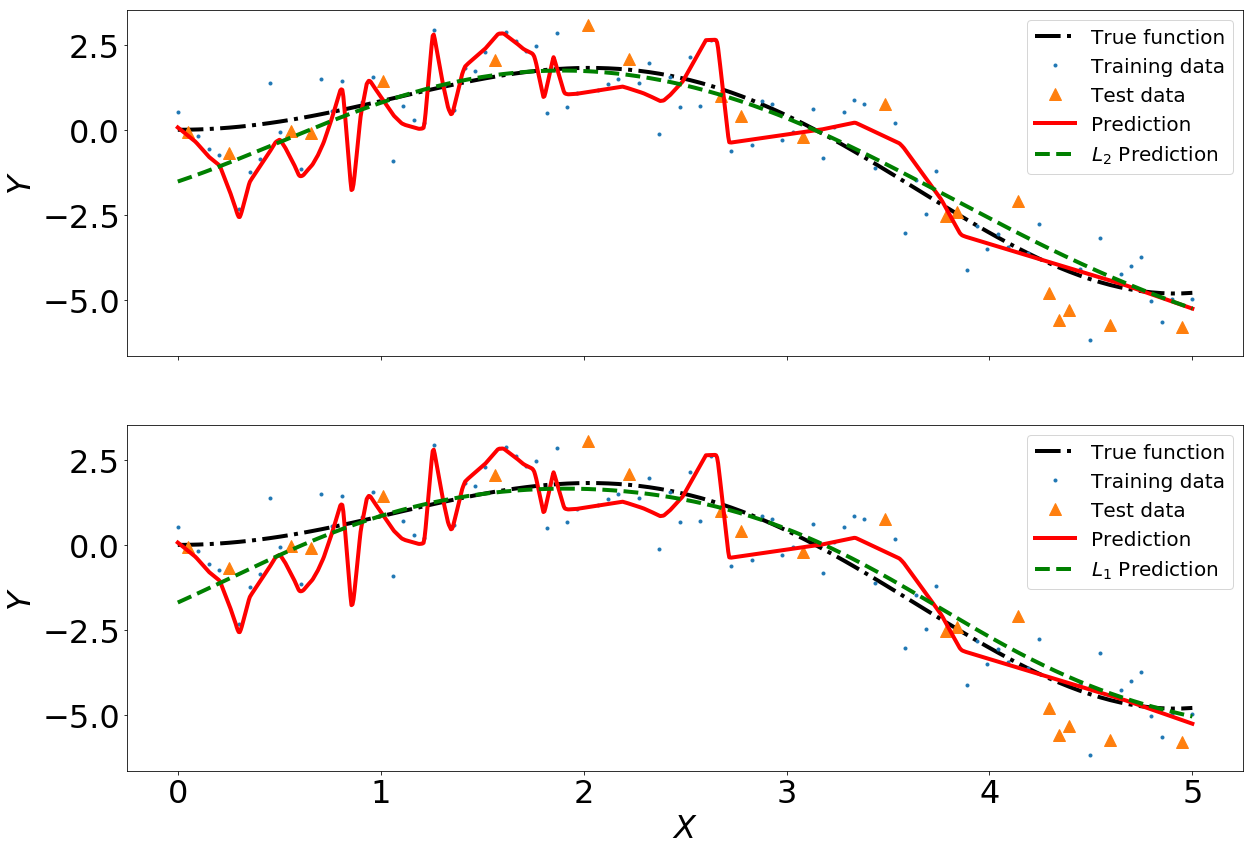

In [17]:
# use our model to predict in the range we want
X_range = np.linspace(0.0, 5, 1000)
y_pred_L2 = model_L2.predict(X_range)

fig, ax = plt.subplots(2, 1, figsize=(20,14), sharex=True)

ax[0].plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax[0].plot(X_train, Y_train, '.', label='Training data')
ax[0].plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax[0].plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax[0].plot(X_range, y_pred_L2, lw=4, ls='--', color='g', label=r'$L_{2}$ Prediction')

ax[0].set_ylabel(r'$Y$', fontsize=32)
ax[0].tick_params(labelsize=32)

ax[0].legend(loc=1, fontsize=20)



y_pred_L1 = model_L1.predict(X_range)

ax[1].plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax[1].plot(X_train, Y_train, '.', label='Training data')
ax[1].plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax[1].plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax[1].plot(X_range, y_pred_L1, lw=4, ls='--', color='g', label=r'$L_{1}$ Prediction')

ax[1].set_xlabel(r'$X$', fontsize=32)
ax[1].set_ylabel(r'$Y$', fontsize=32)
ax[1].tick_params(labelsize=32)

ax[1].legend(loc=1, fontsize=20)

plt.show()

# Early Stopping
The results without any regularization do not look right.  $L_{2}$ and $L_{1}$ regularizaton helped somewhat, but the results still aren't convincing.

We can gain some more insight by plotting the loss functions from the training and validation set.  Let's use a `log-log` scale to enhance any discrepancies between the two curves.

First, a reminder.

Remember that the `fit` method can store the history of the model.  For the unregularized model we stored all the history in the name `no_reg`.  Let's see what attributes are in that object.

In [18]:
dir(no_reg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

There is a lot of stuff; most of it we're not interested in.  However, at the very end of the list, we see some useful keys.  Let's access some of them.

In [19]:
type(no_reg.history)

dict

Looks like `history` is a dictionary.  Let's take a look at it's keys.

In [20]:
no_reg.history.keys()

dict_keys(['val_loss', 'loss'])

Very cool.  There is a `validation` and `training` loss.  

That's the one we'll want to use right now, but we can look at the other attributes too just to get a feel.

In [21]:
type(no_reg.validation_data)

list

In [22]:
type(no_reg.params)

dict

In [23]:
no_reg.params.keys()

dict_keys(['batch_size', 'epochs', 'steps', 'samples', 'verbose', 'do_validation', 'metrics'])

In [24]:
no_reg.params['batch_size']

64

Okay, that was fun and informative.  But what we're really after is the loss data as a function of epoch number.  Here we go.

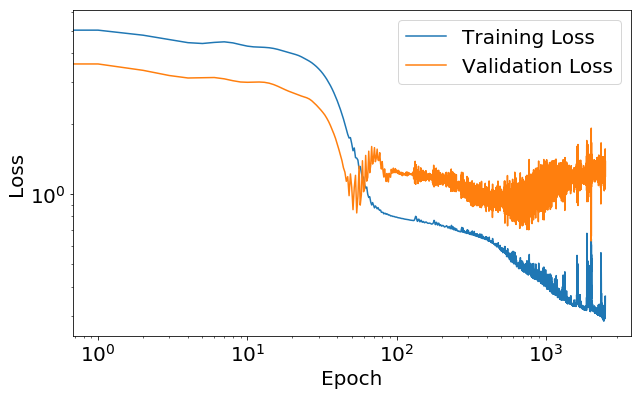

In [25]:
L = no_reg.history['loss']
L_val = no_reg.history['val_loss']

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(L, label='Training Loss')
ax.plot(L_val, label='Validation Loss')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

Wow.  That is striking.

We used $2500$ epochs, but the validation loss begins to rise at around $50$ epochs and becomes larger than the training loss at around $70$ epochs.  After that, we're basically overfitting.

Notice that the training loss keeps decreasing.  We're fitting the training data better and better all the time.  The validation loss is getting larger and larger meaning that we're losing generalizability.

We can use this new information to our advantage!

## Exercise

### Part 1
Train a network without any penalization, but this time stop after $20$ epochs.

### Part 2
Train a network without any penalization, but this time stop at the "optimal" number of epochs (based on the crossing of the loss curves).

**Deliverables**
* Plot the following on a single figure:
  - The true solution
  - The model prediction without any regularization (after $2500$ epochs)
  - The model prediction without any regularization using $20$ epochs
  - The model prediction without any regularization using the optimal number of epochs
* You may also want to include the training and validation data on the same plot.  Be careful that the plot doesn't become too cluttered.

### Solution

#### $20$ epochs

In [26]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

no_reg_20 = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

X_range = np.linspace(0.0, 5, 1000)
y_pred_20 = model.predict(X_range)

Train on 64 samples, validate on 16 samples
Epoch 1/20
64/64 [==============================] - 1s 9ms/step - loss: 5.6850 - val_loss: 4.3002
Epoch 2/20
64/64 [==============================] - 0s 51us/step - loss: 5.4591 - val_loss: 4.1263
Epoch 3/20
64/64 [==============================] - 0s 61us/step - loss: 5.2875 - val_loss: 3.9644
Epoch 4/20
64/64 [==============================] - 0s 58us/step - loss: 5.1294 - val_loss: 3.8123
Epoch 5/20
64/64 [==============================] - 0s 60us/step - loss: 4.9816 - val_loss: 3.6665
Epoch 6/20
64/64 [==============================] - 0s 78us/step - loss: 4.8415 - val_loss: 3.5307
Epoch 7/20
64/64 [==============================] - 0s 101us/step - loss: 4.7147 - val_loss: 3.3985
Epoch 8/20
64/64 [==============================] - 0s 50us/step - loss: 4.5950 - val_loss: 3.2888
Epoch 9/20
64/64 [==============================] - 0s 53us/step - loss: 4.5030 - val_loss: 3.2096
Epoch 10/20
64/64 [==============================] - 0s 103us/ste

#### "Optimal" epochs
This probably isn't the optimal value.  But eye-balling the loss curves, I'm guess that $65$ epochs is the best.

In [27]:
num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

no_reg_opt = model.fit(X_train, Y_train, epochs=65, batch_size=64, validation_split=0.2)

y_pred_opt = model.predict(X_range)

Train on 64 samples, validate on 16 samples
Epoch 1/65
64/64 [==============================] - 0s 7ms/step - loss: 5.5814 - val_loss: 4.2744
Epoch 2/65
64/64 [==============================] - 0s 103us/step - loss: 5.4335 - val_loss: 4.1471
Epoch 3/65
64/64 [==============================] - 0s 84us/step - loss: 5.3074 - val_loss: 4.0126
Epoch 4/65
64/64 [==============================] - 0s 76us/step - loss: 5.1745 - val_loss: 3.8648
Epoch 5/65
64/64 [==============================] - 0s 84us/step - loss: 5.0311 - val_loss: 3.6927
Epoch 6/65
64/64 [==============================] - 0s 80us/step - loss: 4.8668 - val_loss: 3.5205
Epoch 7/65
64/64 [==============================] - 0s 134us/step - loss: 4.7055 - val_loss: 3.3648
Epoch 8/65
64/64 [==============================] - 0s 139us/step - loss: 4.5653 - val_loss: 3.2457
Epoch 9/65
64/64 [==============================] - 0s 124us/step - loss: 4.4689 - val_loss: 3.1780
Epoch 10/65
64/64 [==============================] - 0s 128us/

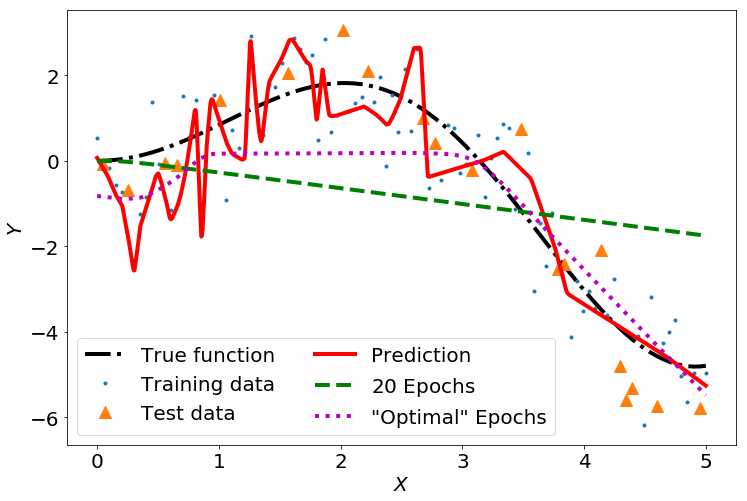

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_20, lw=4, ls='--', color='g', label=r'$20$ Epochs')
ax.plot(X_range, y_pred_opt, lw=4, ls=':', color='m', label=r'"Optimal" Epochs')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()

Let's try to do things more systematically.

How do you think early stopping should be implemented?

To do early stopping in `Keras`, you specify the `EarlyStopping` [*callback*](https://keras.io/callbacks/).  From the documentation:
> A callback is a set of functions to be applied at given stages of the training procedure.

Callbacks can be used to view internal states and statistics of the model during training.

Right now, we'll use one to monitor the validation loss function.  When the validation loss starts to go up, the training process will stop.

#### Basic Syntax
To specify a callback, you just pass a `callbacks` list into the model `fit()` method, like this:
```python
from keras.callbacks import EarlyStopping

model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
```

## Exercise
Fit the model using the early stopping technique.  Try different values for `patience` to see which one gives you the lowest validation loss.

How many epochs are needed?

### Solution

In [33]:
from keras.callbacks import EarlyStopping

num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu'))
    
model.add(layers.Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model
no_reg_ES = model.fit(X_train, Y_train, epochs=2500, batch_size=64, validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

Train on 64 samples, validate on 16 samples
Epoch 1/2500
64/64 [==============================] - 1s 10ms/step - loss: 5.7513 - val_loss: 4.4468
Epoch 2/2500
64/64 [==============================] - 0s 61us/step - loss: 5.6040 - val_loss: 4.3182
Epoch 3/2500
64/64 [==============================] - 0s 55us/step - loss: 5.4765 - val_loss: 4.2163
Epoch 4/2500
64/64 [==============================] - 0s 70us/step - loss: 5.3769 - val_loss: 4.1092
Epoch 5/2500
64/64 [==============================] - 0s 75us/step - loss: 5.2707 - val_loss: 3.9941
Epoch 6/2500
64/64 [==============================] - 0s 114us/step - loss: 5.1575 - val_loss: 3.8633
Epoch 7/2500
64/64 [==============================] - 0s 100us/step - loss: 5.0298 - val_loss: 3.7343
Epoch 8/2500
64/64 [==============================] - 0s 88us/step - loss: 4.9052 - val_loss: 3.5971
Epoch 9/2500
64/64 [==============================] - 0s 64us/step - loss: 4.7751 - val_loss: 3.4640
Epoch 10/2500
64/64 [========================

Epoch 81/2500
64/64 [==============================] - 0s 58us/step - loss: 1.0457 - val_loss: 1.5592
Epoch 82/2500
64/64 [==============================] - 0s 56us/step - loss: 1.0085 - val_loss: 1.4233
Epoch 83/2500
64/64 [==============================] - 0s 75us/step - loss: 0.9625 - val_loss: 1.2402
Epoch 84/2500
64/64 [==============================] - 0s 101us/step - loss: 0.9690 - val_loss: 1.4342
Epoch 85/2500
64/64 [==============================] - 0s 78us/step - loss: 0.9185 - val_loss: 1.4632
Epoch 86/2500
64/64 [==============================] - 0s 86us/step - loss: 0.9065 - val_loss: 1.2520
Epoch 87/2500
64/64 [==============================] - 0s 68us/step - loss: 0.8873 - val_loss: 1.2579
Epoch 88/2500
64/64 [==============================] - 0s 64us/step - loss: 0.8660 - val_loss: 1.3746
Epoch 89/2500
64/64 [==============================] - 0s 78us/step - loss: 0.8639 - val_loss: 1.3045
Epoch 90/2500
64/64 [==============================] - 0s 55us/step - loss: 0.848

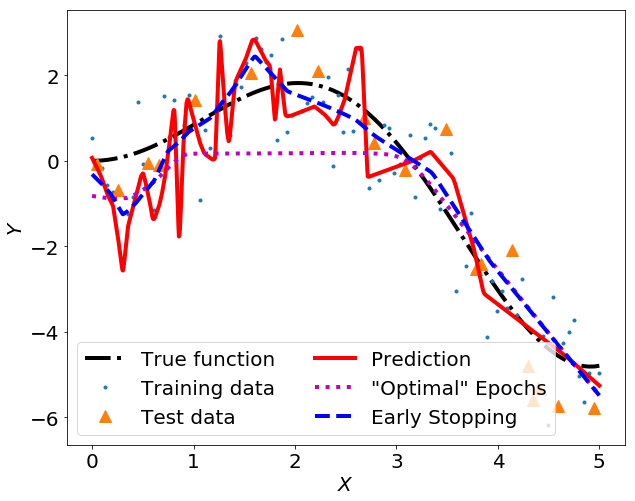

In [34]:
y_pred_ES = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_opt, lw=4, ls=':', color='m', label=r'"Optimal" Epochs')
ax.plot(X_range, y_pred_ES, lw=4, ls='--', color='b', label=r'Early Stopping')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()

The solution should looks pretty good.  Of course, we had to play with the `patience` parameter.

# Dropout
The basic idea behind the dropout technique is to randomly remove (i.e drop) at unit from the network including all of its connections.  Why would we want to do such a thing?  Because we want to avoid overfitting.  An intuitive way of seeing this is that by randomly dropping units at each iteration, we are actually training an ensemble of models.  This ensemble may be more robust to different scenarios than a single model.

One usually needs to figure out how many units to drop in each layer.  Of course, this introduces a new hyperparameter to tune.  However, at least empirically, it appears that choosing a dropout rate of $0.5$ in the hidden layers and $0.8$ in the input layers works well.  Note that here the term "dropout rate" means "the probability of retention of each node in the layer".

Dropout usually works best on large networks.  We will use it on our small lab network today just to understand some of the mechanics.

The original paper on dropout has some nice explanations of the technique and also some really nice practical advice on using the technique:  [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf).

In [35]:
from keras.constraints import maxnorm

num_layers = 5
N = 100

input_dim = 1

model = models.Sequential()

model.add(layers.Dense(N, input_dim=input_dim, activation='relu'))

# Create hidden layers
for h in range(num_layers):
    model.add(layers.Dense(N, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model
no_reg_dropout = model.fit(X_train, Y_train, epochs=250, batch_size=64, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/250
64/64 [==============================] - 1s 11ms/step - loss: 5.4625 - val_loss: 4.2916
Epoch 2/250
64/64 [==============================] - 0s 62us/step - loss: 5.5659 - val_loss: 4.2291
Epoch 3/250
64/64 [==============================] - 0s 76us/step - loss: 5.0181 - val_loss: 4.1558
Epoch 4/250
64/64 [==============================] - 0s 81us/step - loss: 5.2589 - val_loss: 4.0976
Epoch 5/250
64/64 [==============================] - 0s 86us/step - loss: 5.1810 - val_loss: 4.0432
Epoch 6/250
64/64 [==============================] - 0s 107us/step - loss: 5.0163 - val_loss: 3.9778
Epoch 7/250
64/64 [==============================] - 0s 85us/step - loss: 4.5380 - val_loss: 3.9182
Epoch 8/250
64/64 [==============================] - 0s 66us/step - loss: 4.8667 - val_loss: 3.8667
Epoch 9/250
64/64 [==============================] - 0s 121us/step - loss: 4.3176 - val_loss: 3.8156
Epoch 10/250
64/64 [==============================] - 

Epoch 82/250
64/64 [==============================] - 0s 85us/step - loss: 3.2313 - val_loss: 3.4101
Epoch 83/250
64/64 [==============================] - 0s 72us/step - loss: 3.1905 - val_loss: 3.4019
Epoch 84/250
64/64 [==============================] - 0s 80us/step - loss: 4.1078 - val_loss: 3.4441
Epoch 85/250
64/64 [==============================] - 0s 73us/step - loss: 3.2279 - val_loss: 3.4591
Epoch 86/250
64/64 [==============================] - 0s 73us/step - loss: 3.3052 - val_loss: 3.4557
Epoch 87/250
64/64 [==============================] - 0s 86us/step - loss: 3.0276 - val_loss: 3.4593
Epoch 88/250
64/64 [==============================] - 0s 72us/step - loss: 3.1824 - val_loss: 3.4515
Epoch 89/250
64/64 [==============================] - 0s 74us/step - loss: 2.9754 - val_loss: 3.4530
Epoch 90/250
64/64 [==============================] - 0s 80us/step - loss: 2.9749 - val_loss: 3.4604
Epoch 91/250
64/64 [==============================] - 0s 95us/step - loss: 2.6722 - val_los

Epoch 163/250
64/64 [==============================] - 0s 90us/step - loss: 1.9991 - val_loss: 3.0509
Epoch 164/250
64/64 [==============================] - 0s 88us/step - loss: 2.0359 - val_loss: 3.2033
Epoch 165/250
64/64 [==============================] - 0s 78us/step - loss: 2.0764 - val_loss: 3.4452
Epoch 166/250
64/64 [==============================] - 0s 74us/step - loss: 2.0478 - val_loss: 3.6806
Epoch 167/250
64/64 [==============================] - 0s 94us/step - loss: 2.2436 - val_loss: 3.8041
Epoch 168/250
64/64 [==============================] - 0s 66us/step - loss: 2.1278 - val_loss: 3.6818
Epoch 169/250
64/64 [==============================] - 0s 79us/step - loss: 1.9857 - val_loss: 3.5283
Epoch 170/250
64/64 [==============================] - 0s 79us/step - loss: 2.2285 - val_loss: 3.3750
Epoch 171/250
64/64 [==============================] - 0s 68us/step - loss: 1.6437 - val_loss: 3.1974
Epoch 172/250
64/64 [==============================] - 0s 84us/step - loss: 2.3124

Epoch 244/250
64/64 [==============================] - 0s 87us/step - loss: 2.0191 - val_loss: 3.1454
Epoch 245/250
64/64 [==============================] - 0s 74us/step - loss: 1.3187 - val_loss: 3.2533
Epoch 246/250
64/64 [==============================] - 0s 93us/step - loss: 1.7053 - val_loss: 3.1529
Epoch 247/250
64/64 [==============================] - 0s 68us/step - loss: 1.8359 - val_loss: 2.9471
Epoch 248/250
64/64 [==============================] - 0s 74us/step - loss: 1.3799 - val_loss: 2.7898
Epoch 249/250
64/64 [==============================] - 0s 81us/step - loss: 1.7964 - val_loss: 2.5290
Epoch 250/250
64/64 [==============================] - 0s 107us/step - loss: 1.2522 - val_loss: 2.2660


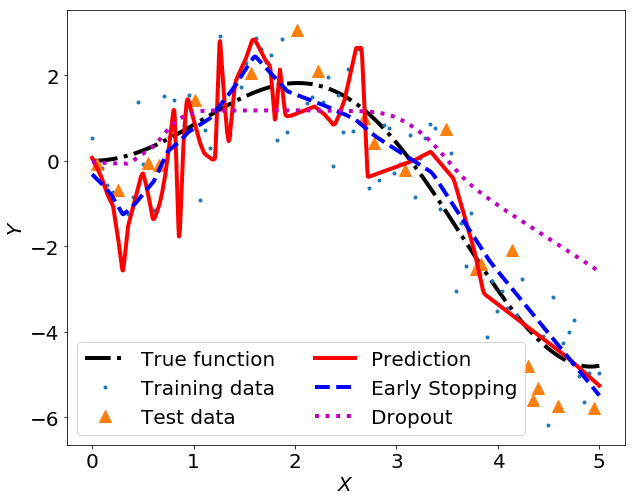

In [36]:
y_pred_DO = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.plot(X_true, Y_true, color='k', ls='-.', lw=4, label='True function')
ax.plot(X_train, Y_train, '.', label='Training data')
ax.plot(X_test, Y_test, ls='', marker='^',  ms=12, label='Test data')
ax.plot(X_range, y_pred, lw=4, color='r', label='Prediction')
ax.plot(X_range, y_pred_ES, lw=4, ls='--', color='b', label=r'Early Stopping')
ax.plot(X_range, y_pred_DO, lw=4, ls=':', color='m', label=r'Dropout')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.tick_params(labelsize=20)

ax.legend(loc=3, ncol=2, fontsize=20)

plt.show()